<a href="https://colab.research.google.com/github/KubraNurKarakurt/Balik-Tur-Tespit-Modeli-YOLOv11/blob/master/Balik_tur_tespiti_yolov11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Nov 28 09:01:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics    # Install the Ultralytics Package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 20.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()     # Import All the Requried Libraries

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow    #  Download Dataset from Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=".....")
project = rf.workspace("....").project("balik_model")
version = project.version(3)
dataset = version.download("yolov11")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Balik_model-3 in yolov11:: 100%|██████████| 6174/6174 [00:01<00:00, 4789.87it/s]


In [ ]:
dataset.location

'/content/Balik_model-3'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640   # Train YOLO11 Model on a Custom Dataset

100% 5.35M/5.35M [00:00<00:00, 94.2MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Balik_model-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

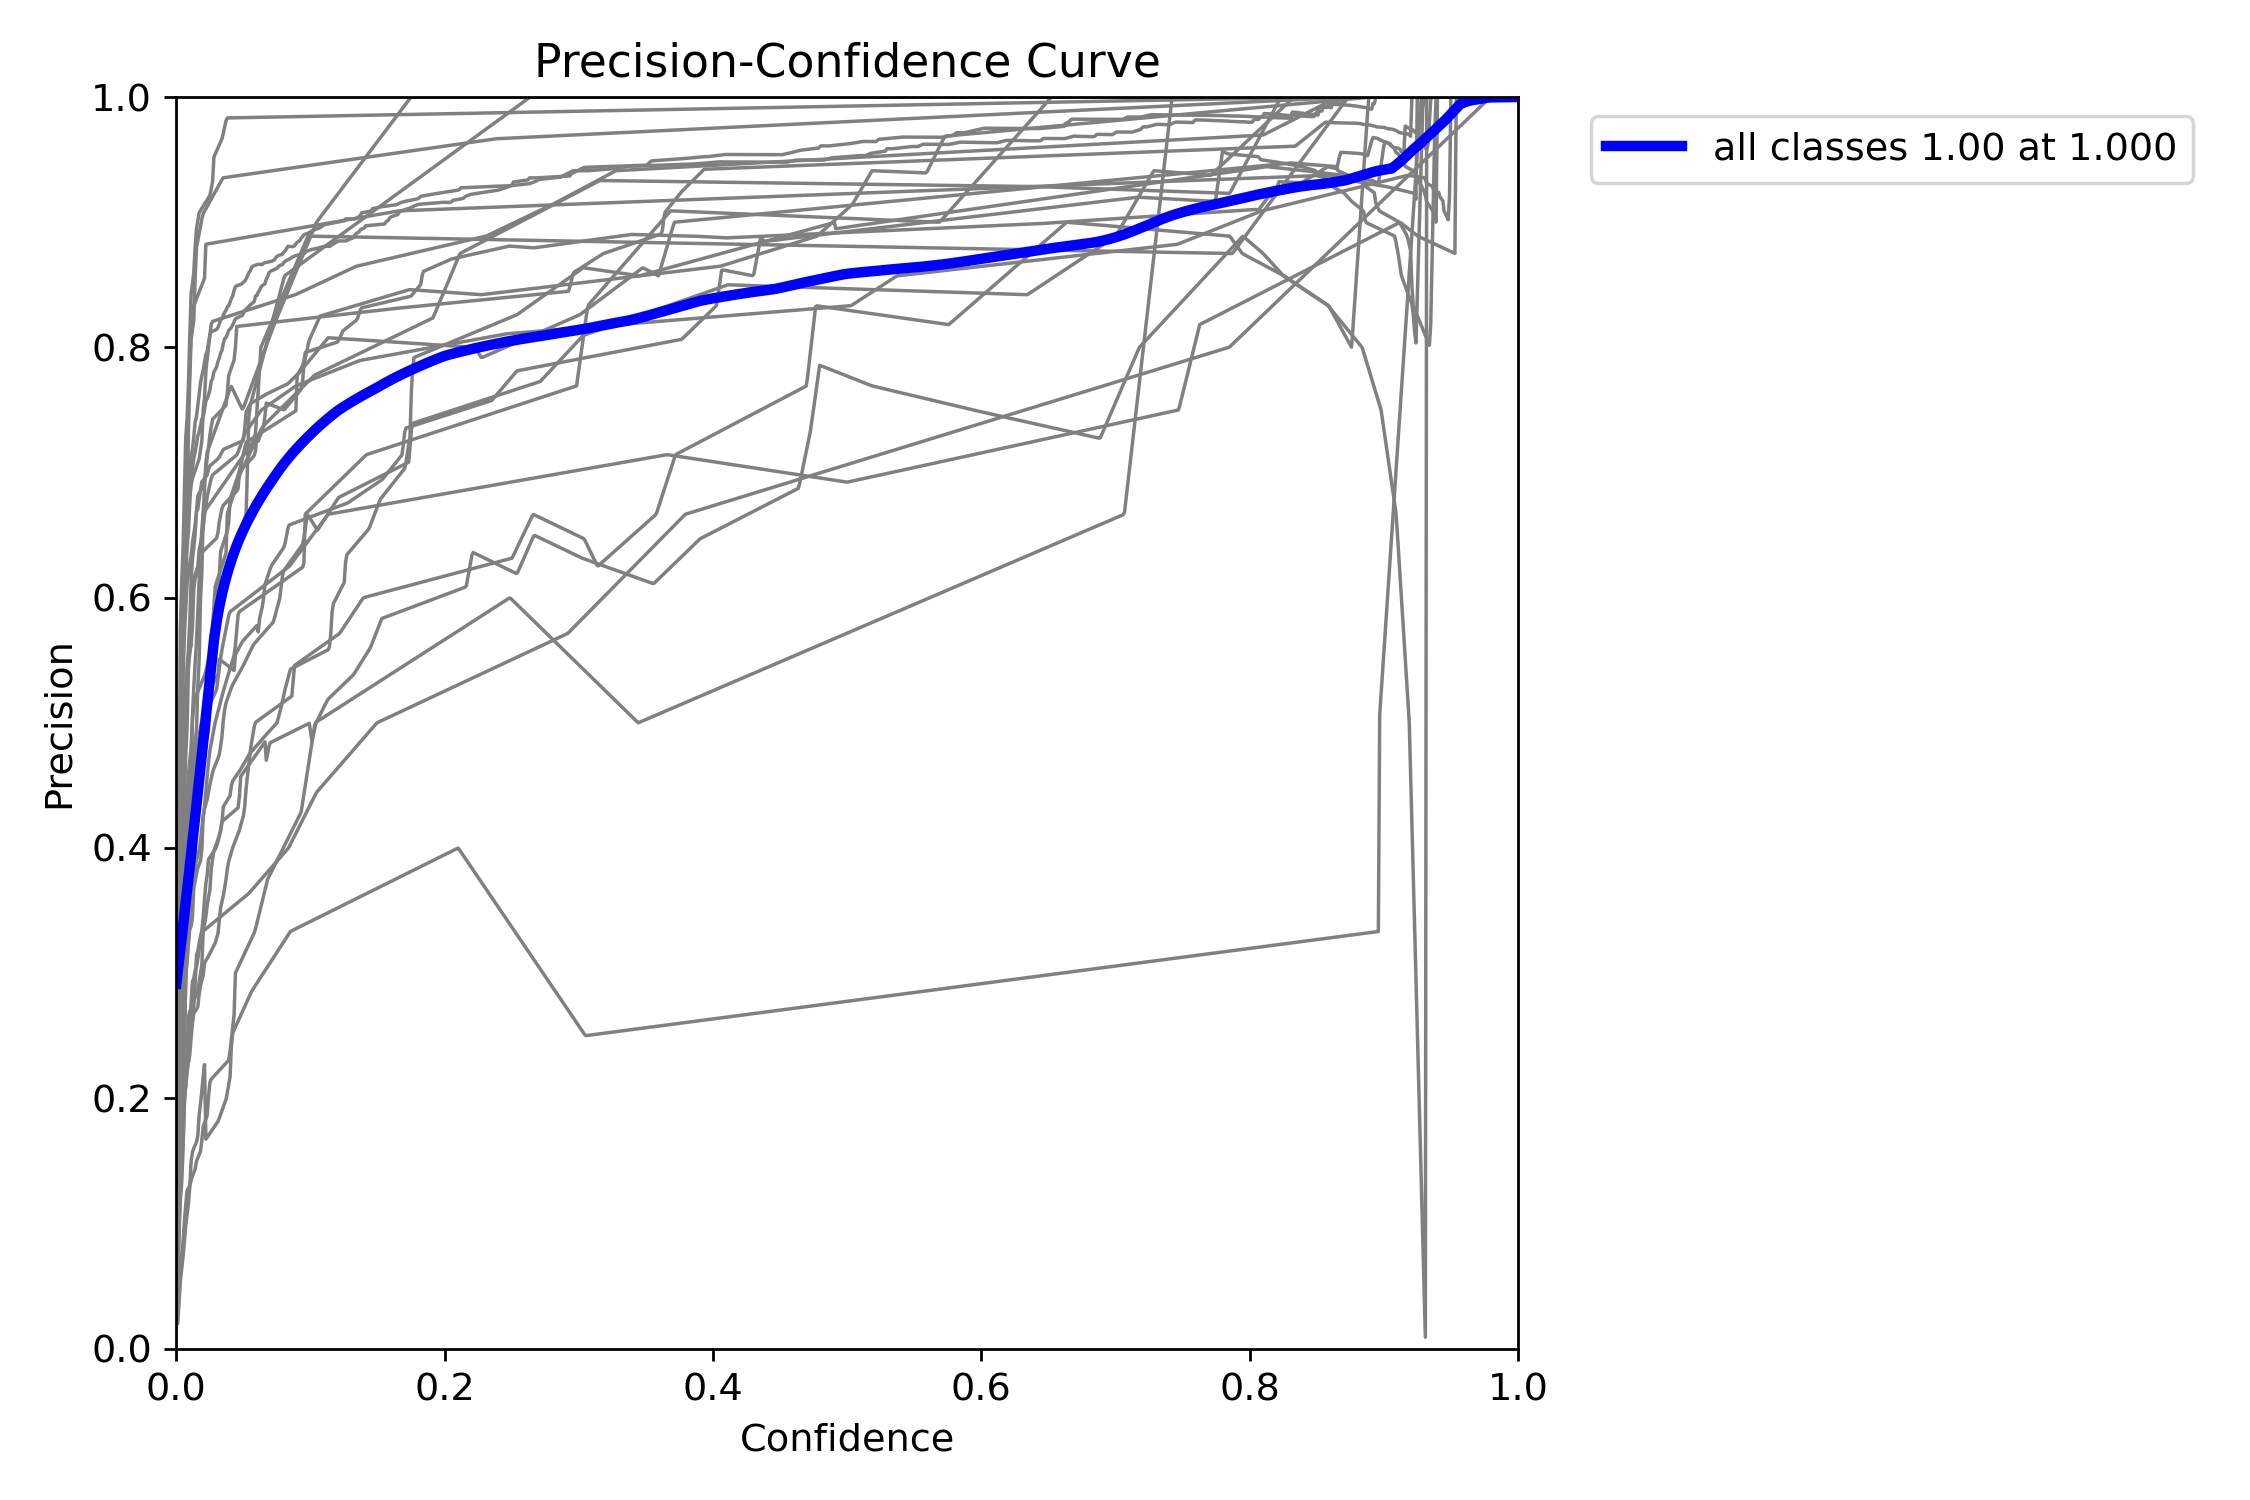

In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)  # 05 Examine Training Results

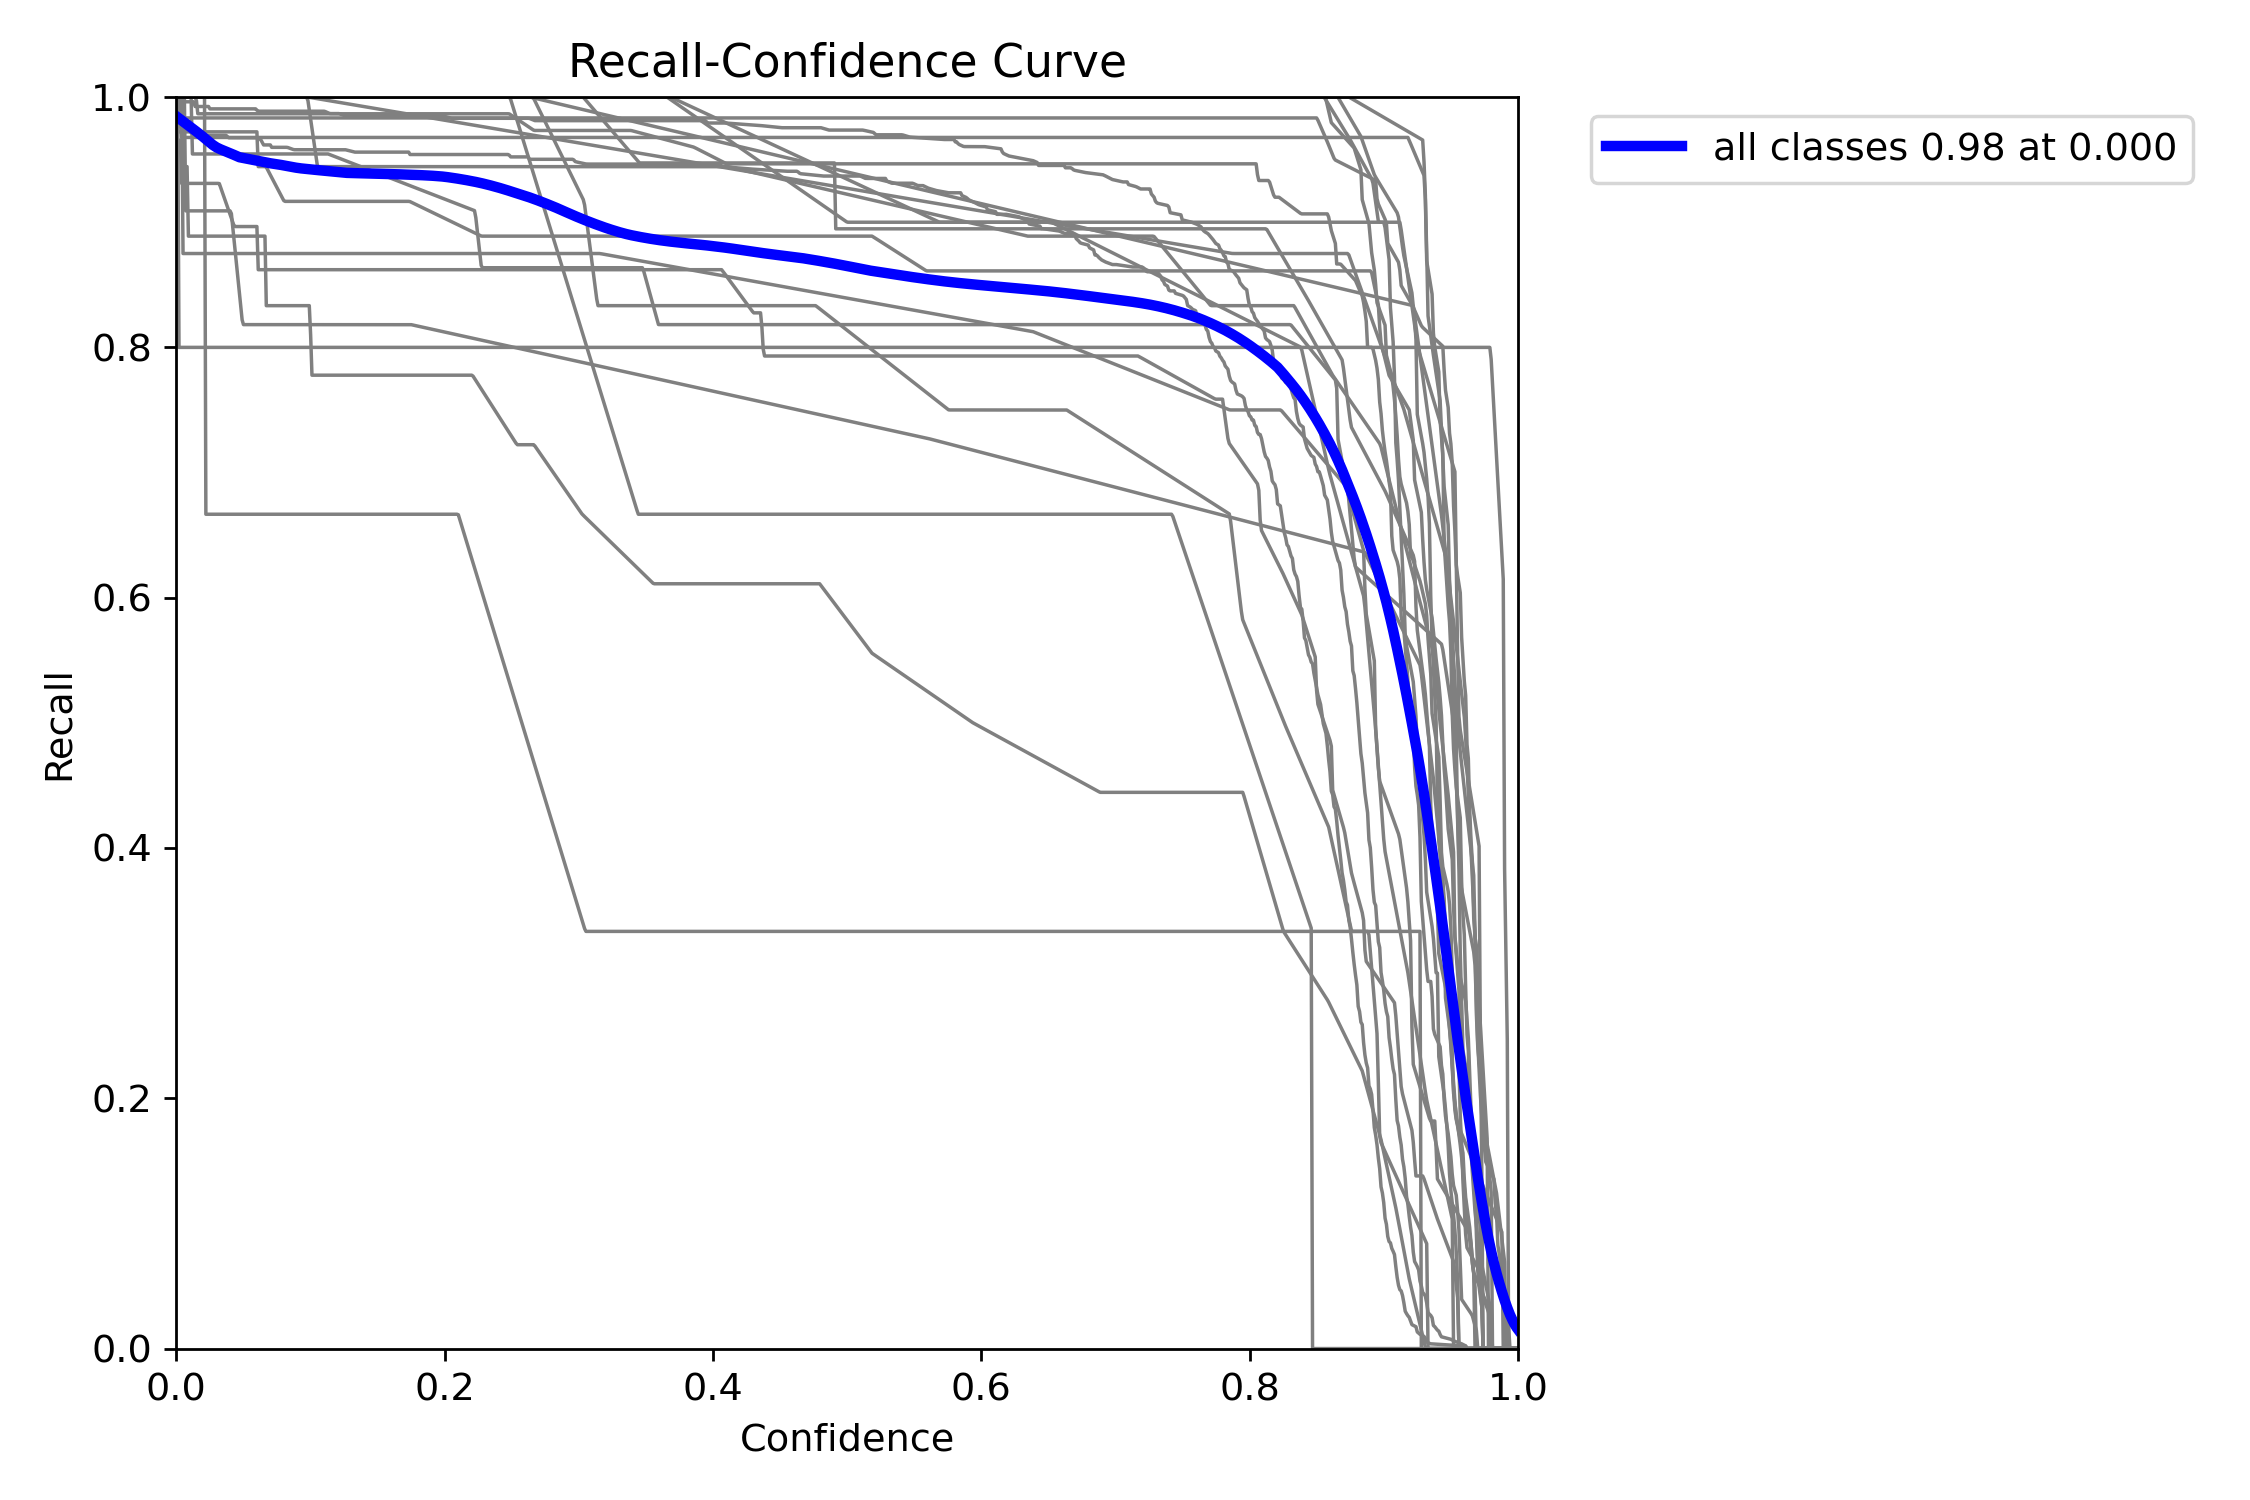

In [ ]:
Image("/content/runs/detect/train/R_curve.png", width=600)

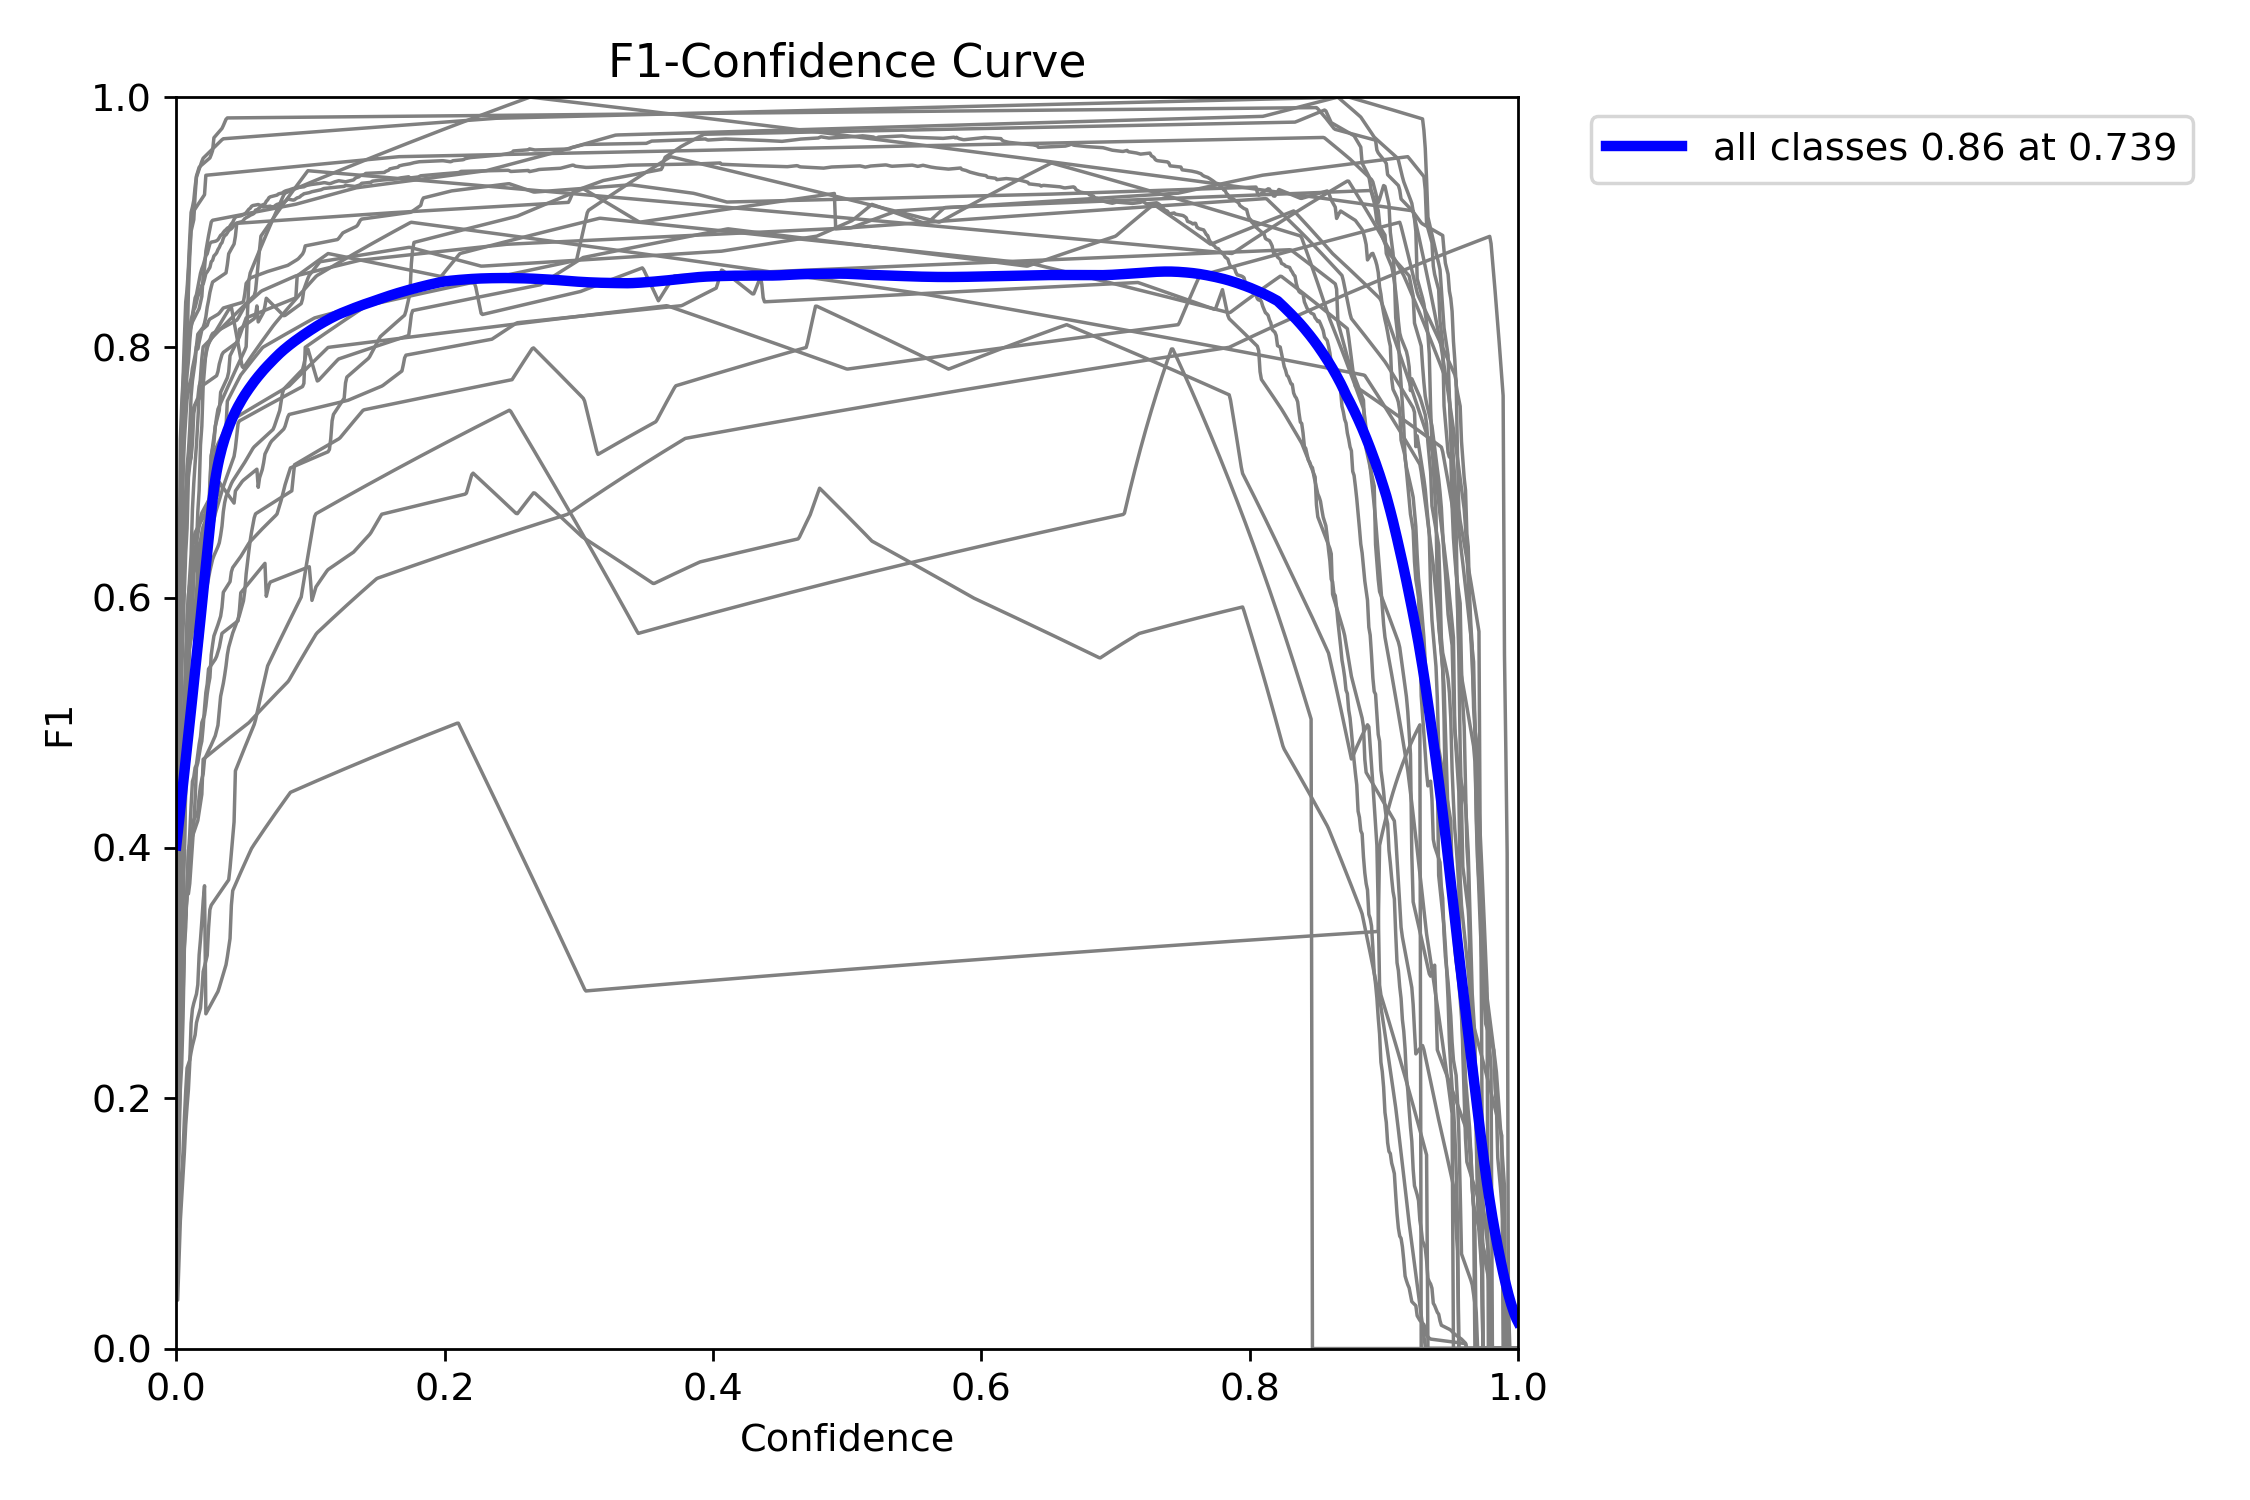

In [ ]:
Image("/content/runs/detect/train/F1_curve.png", width=600)

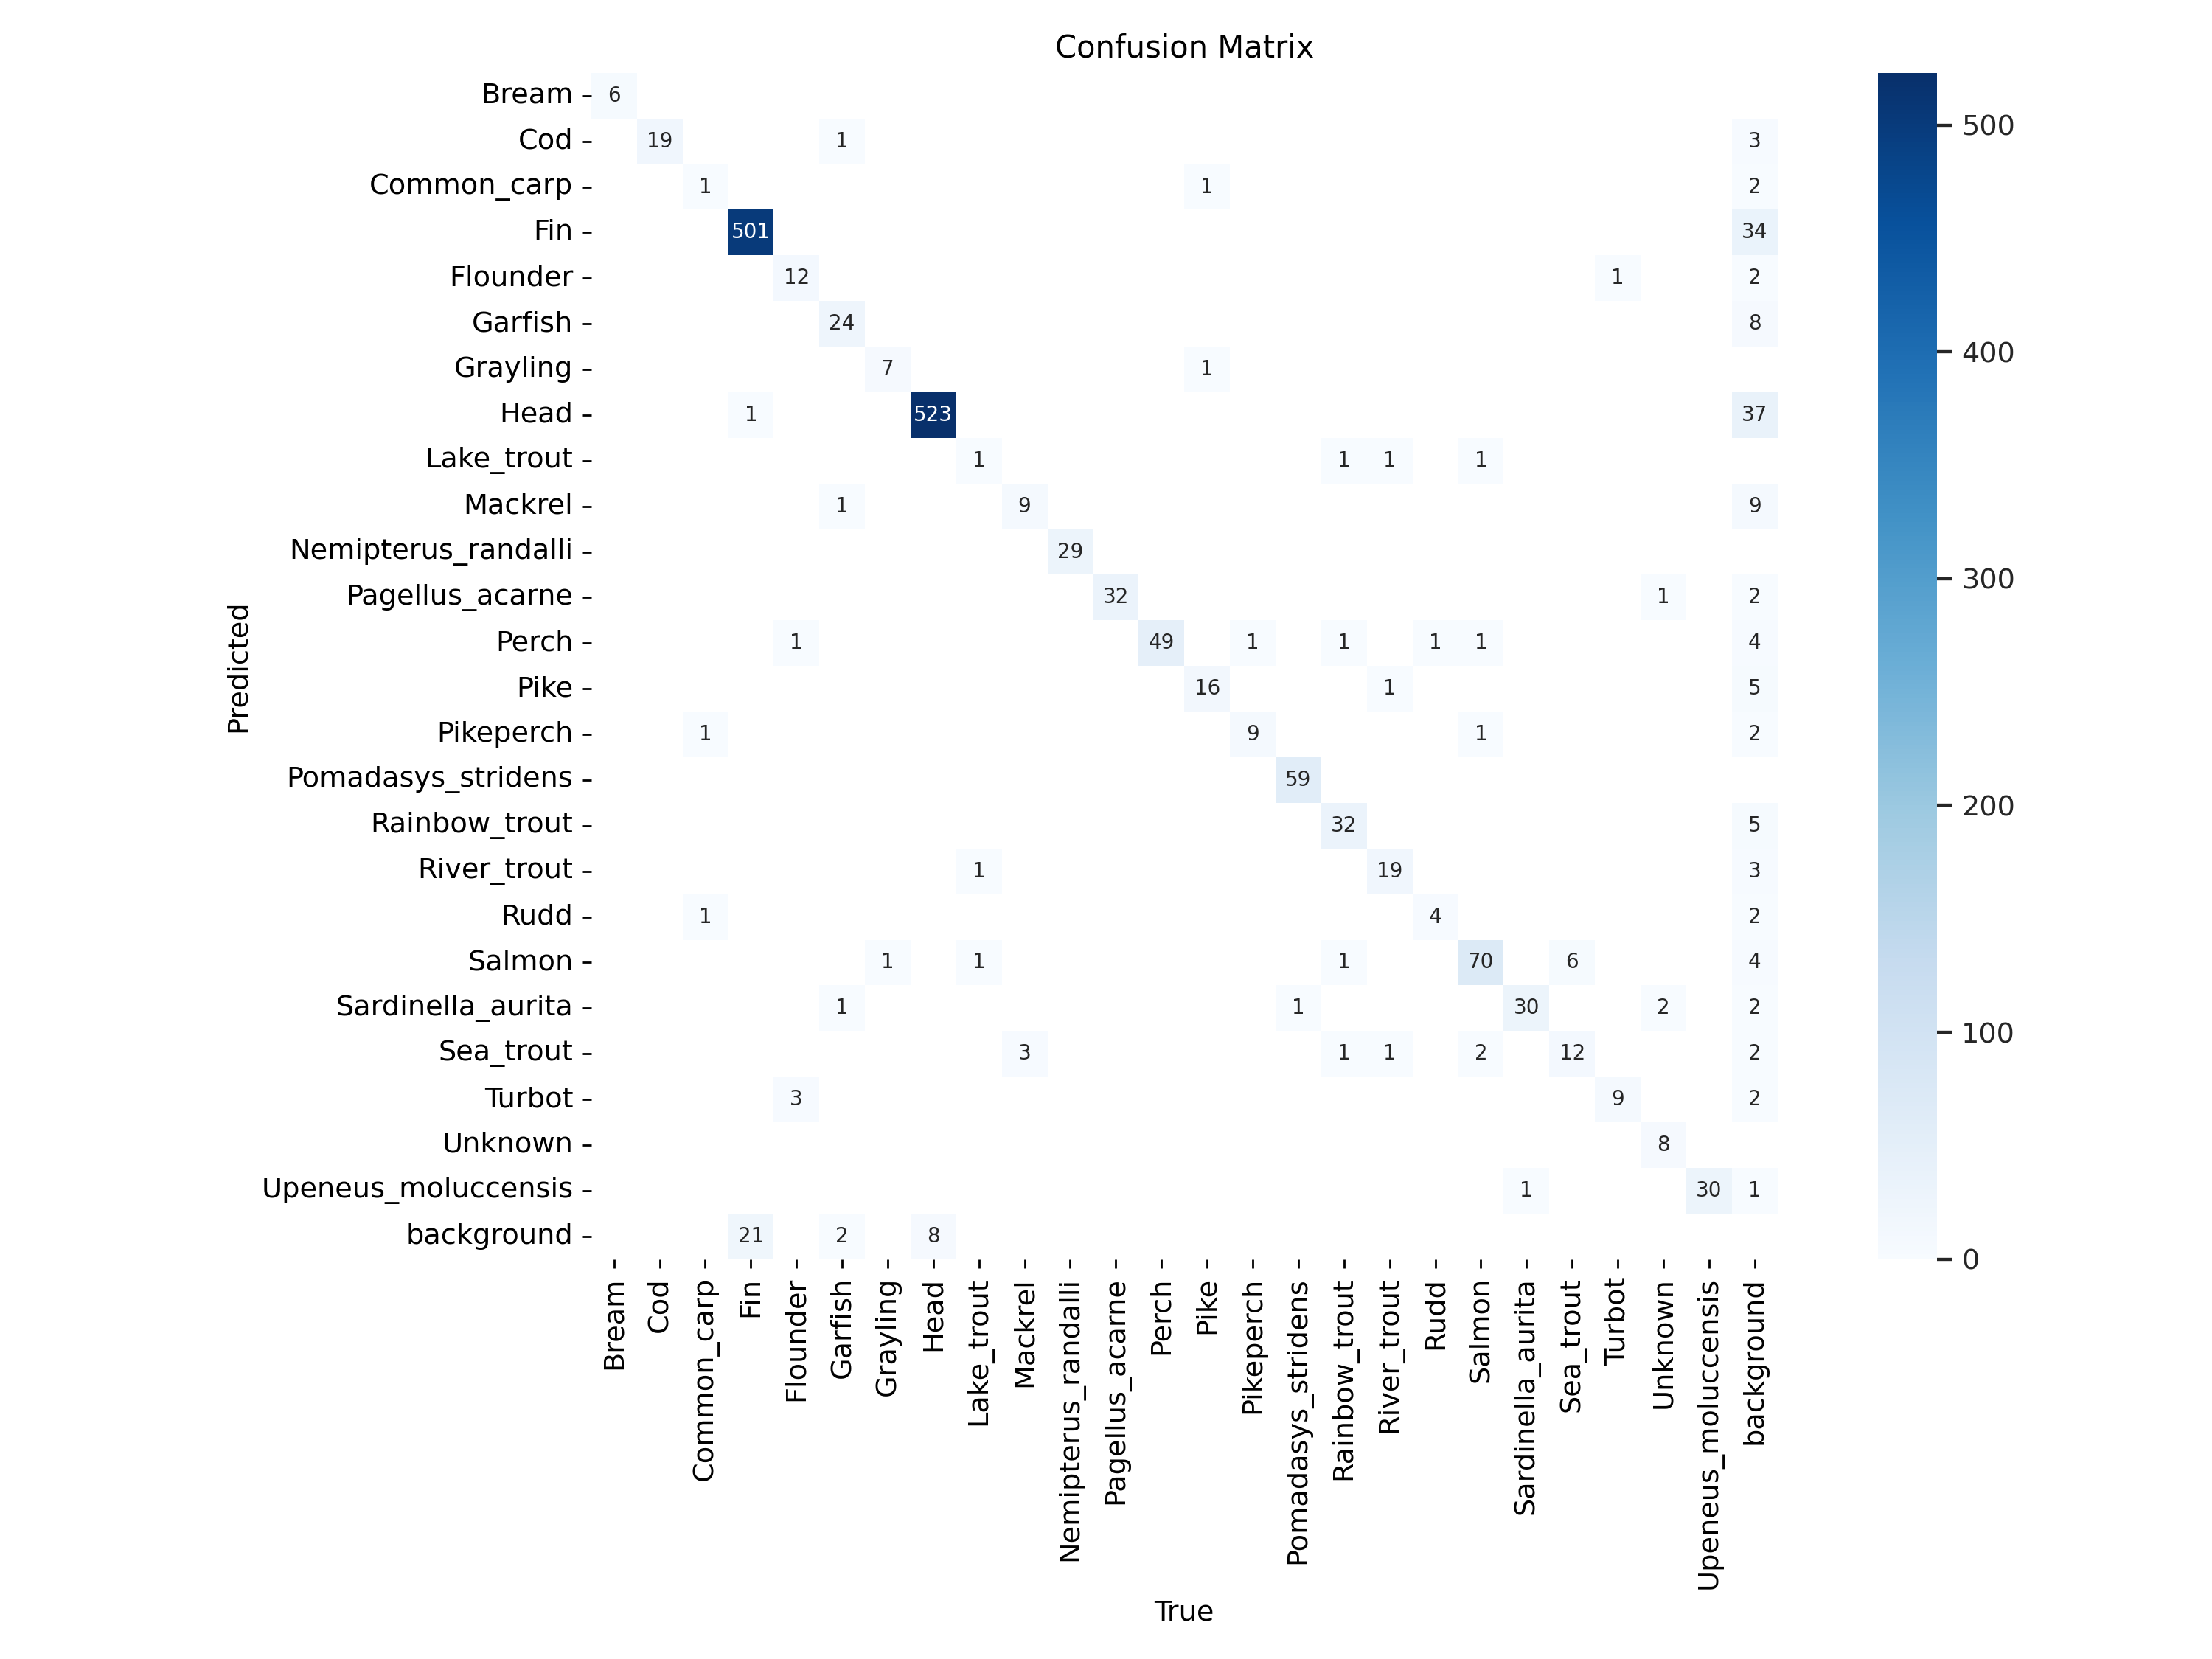

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

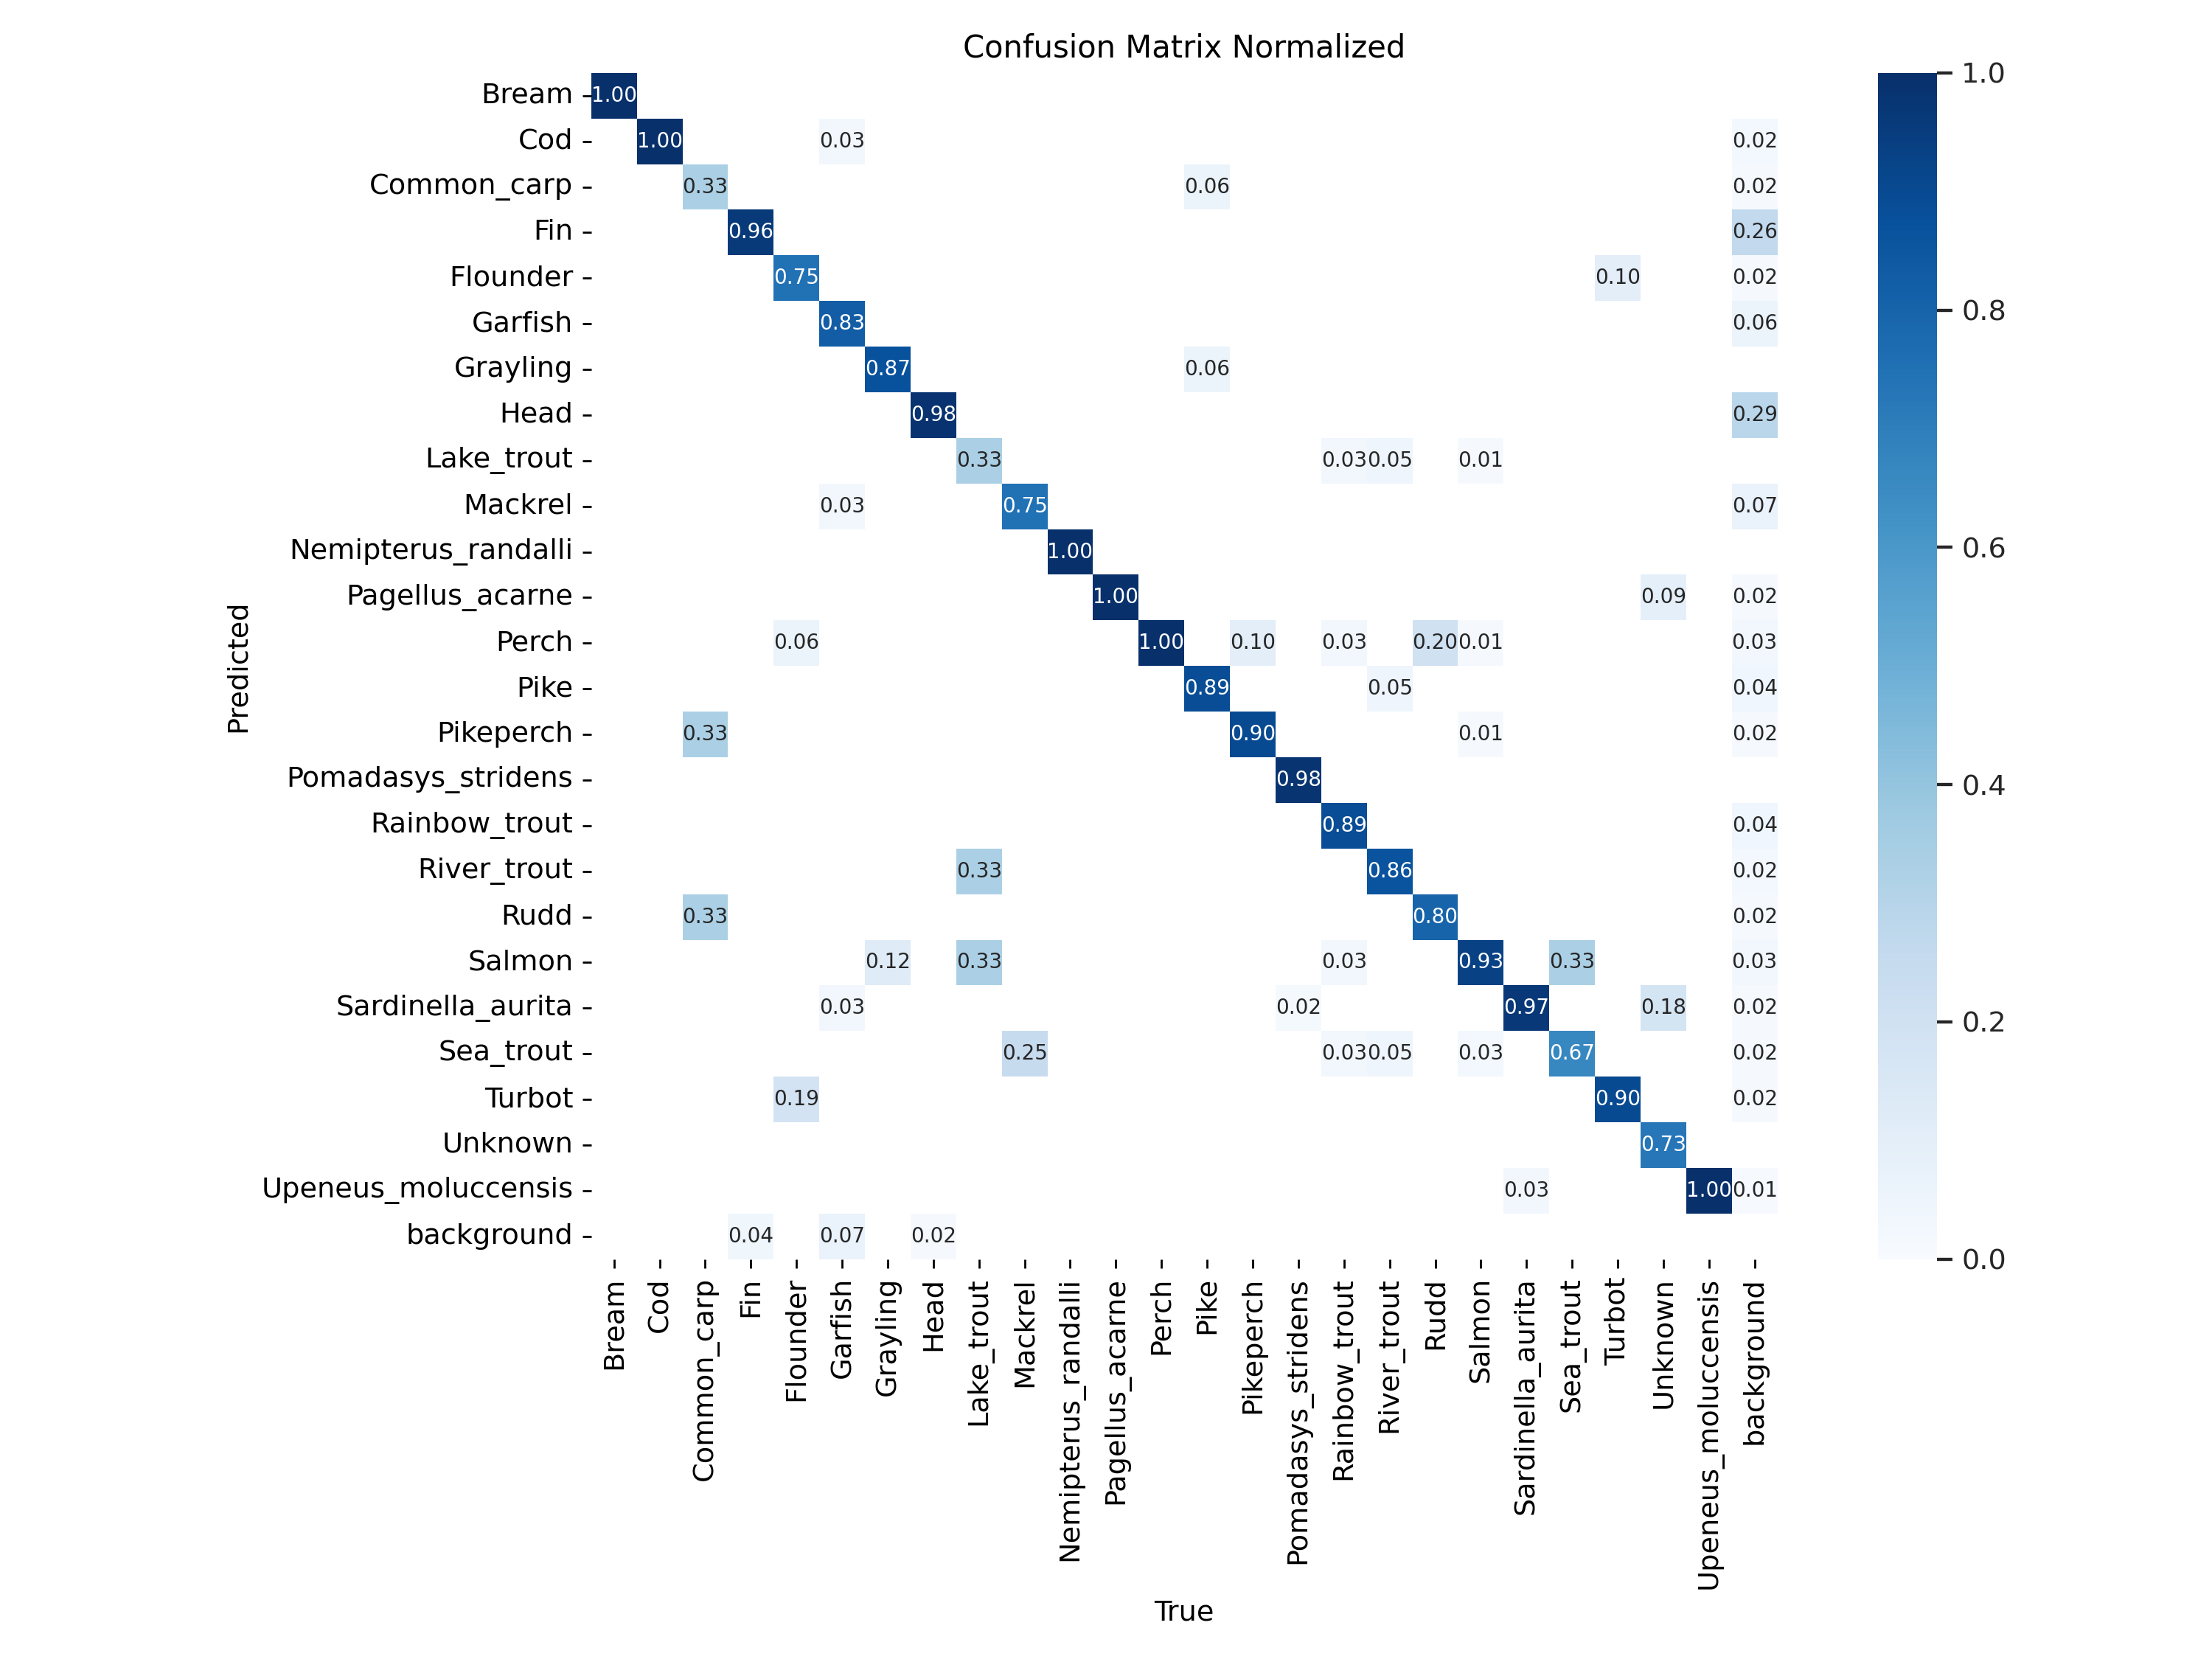

In [ ]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

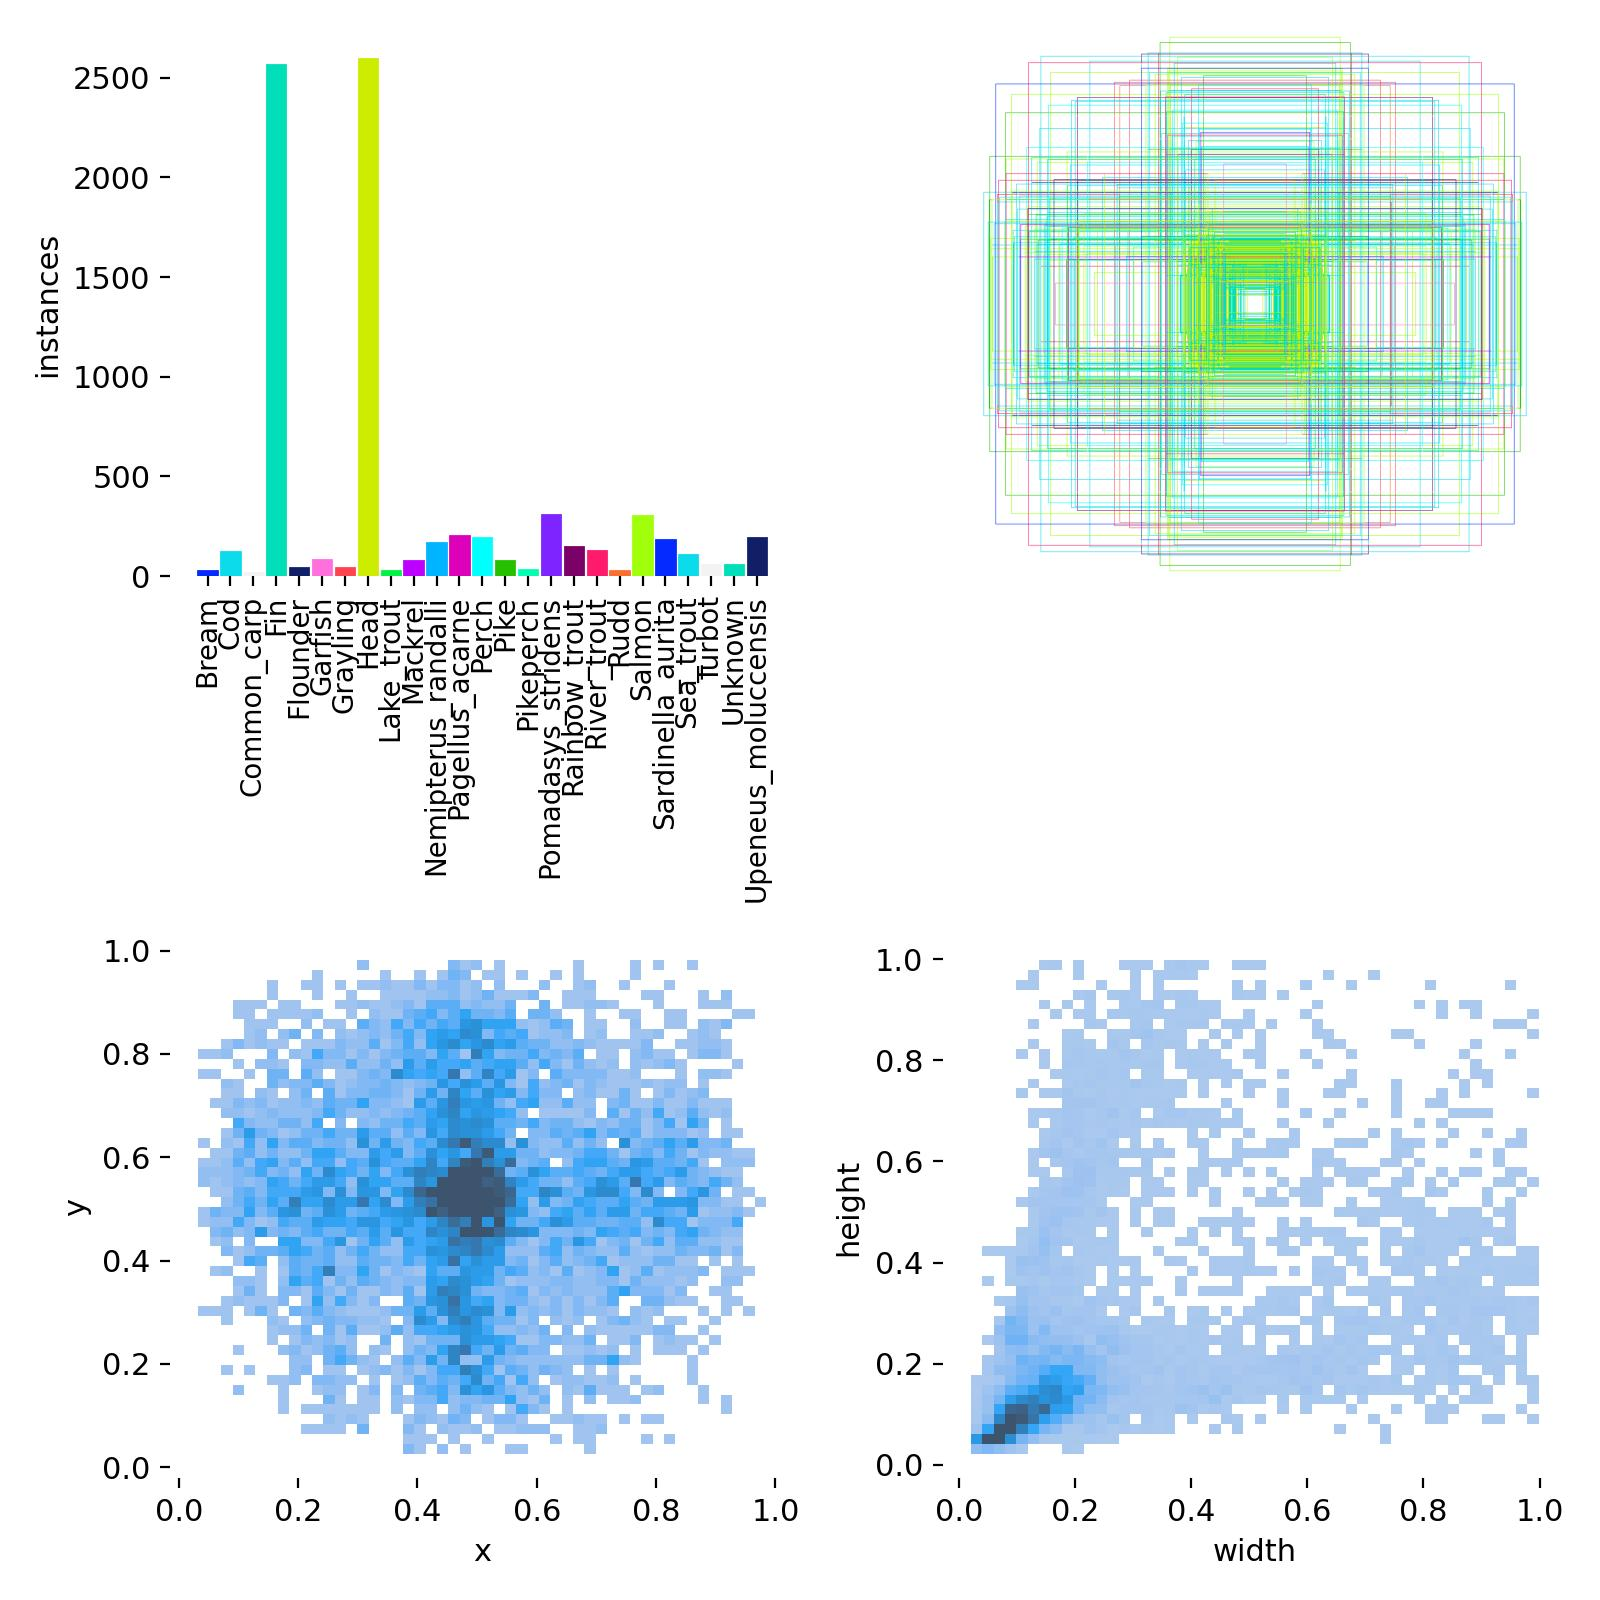

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

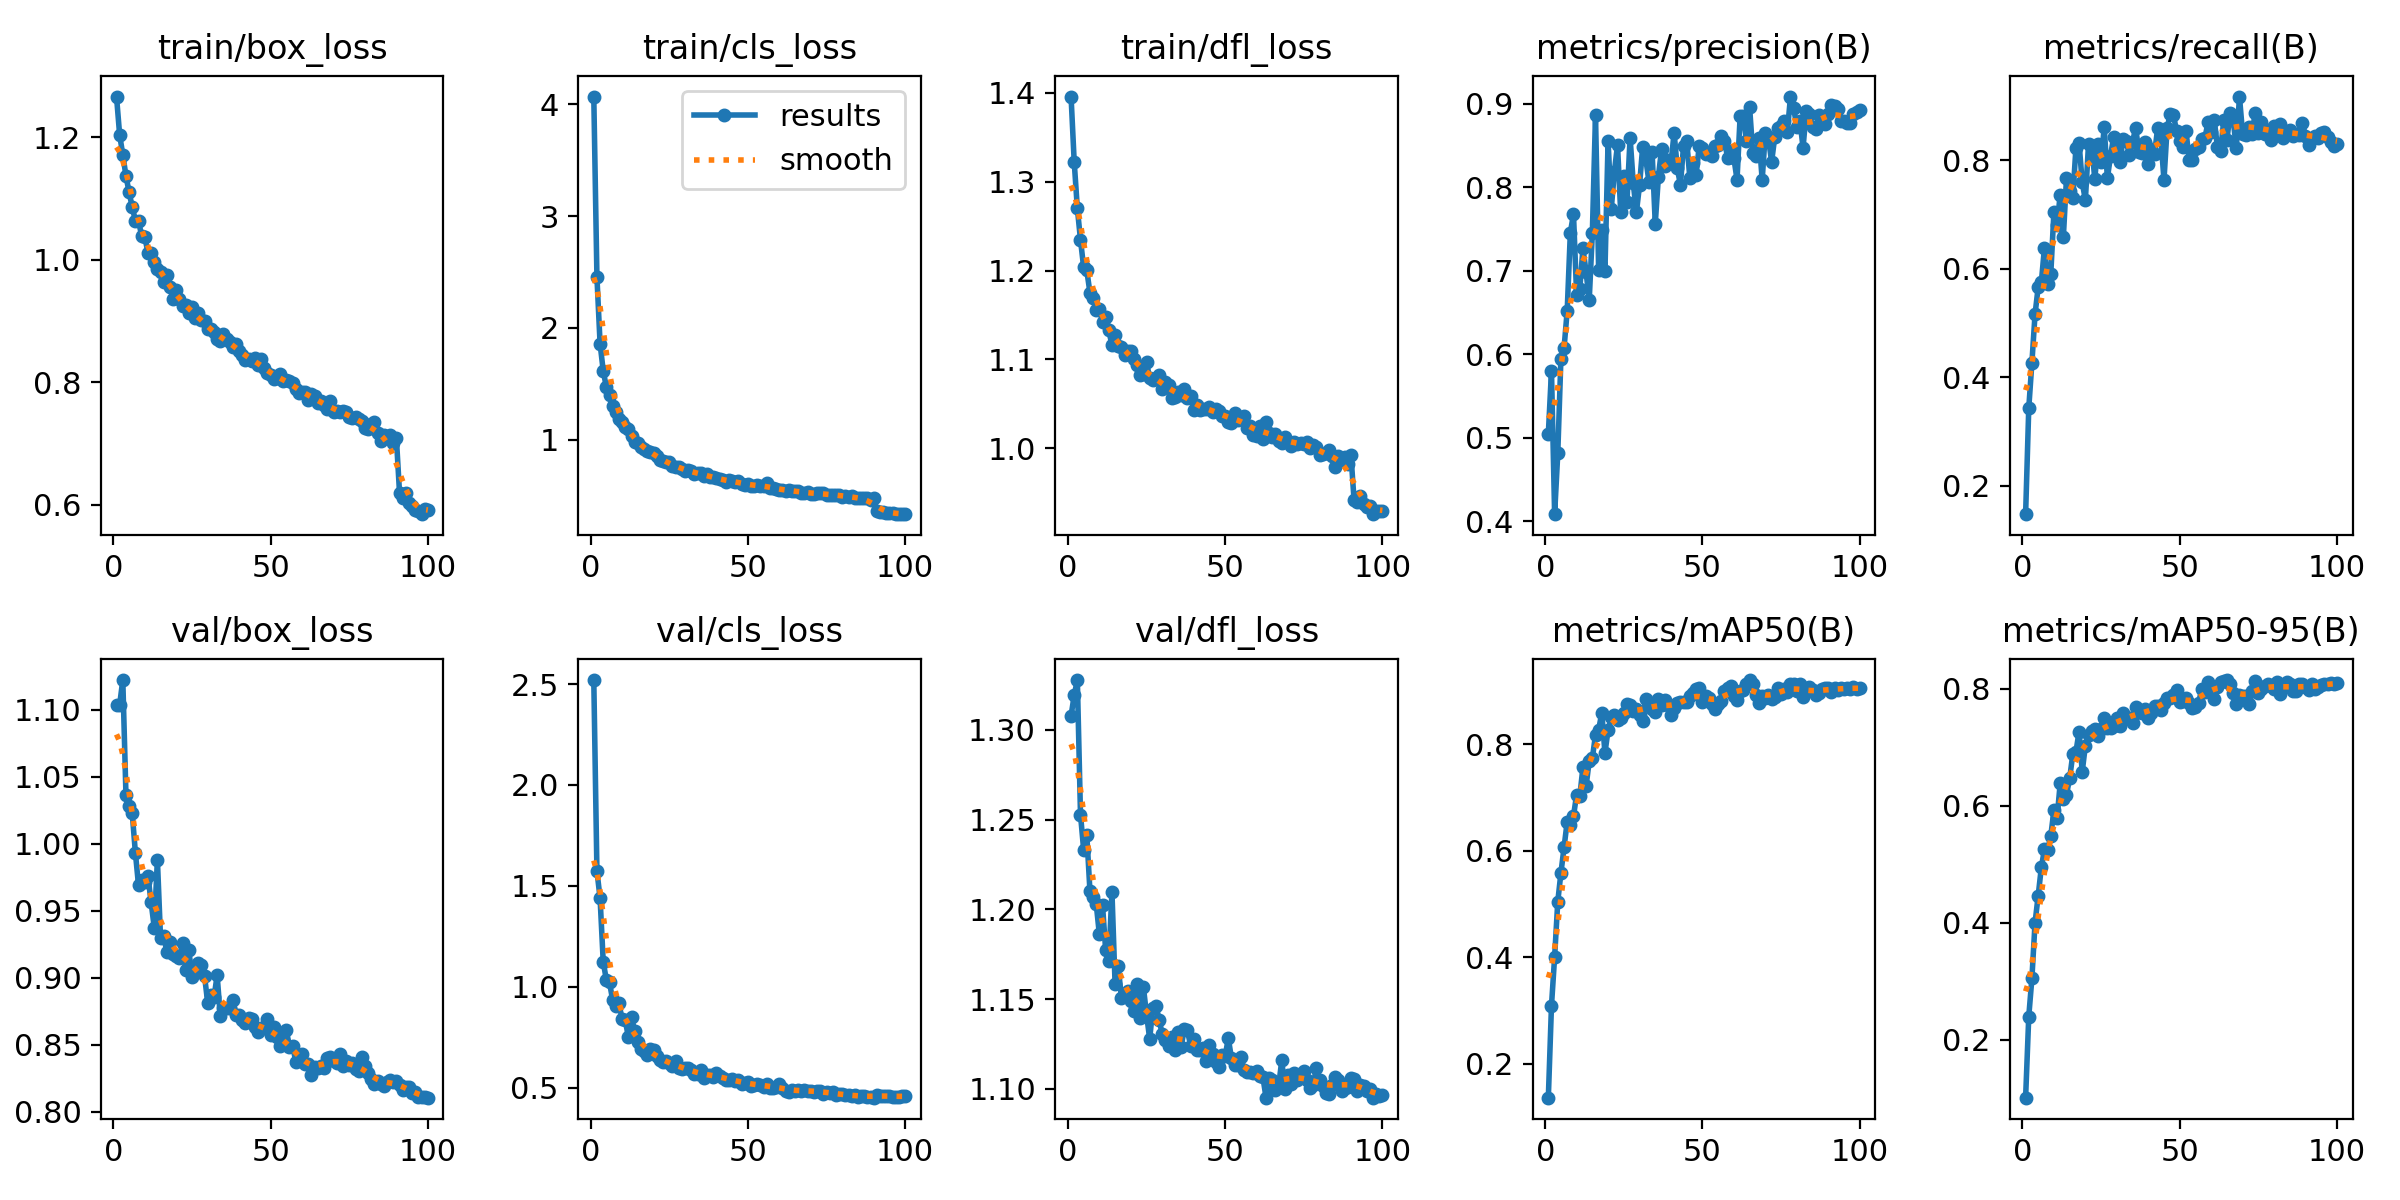

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

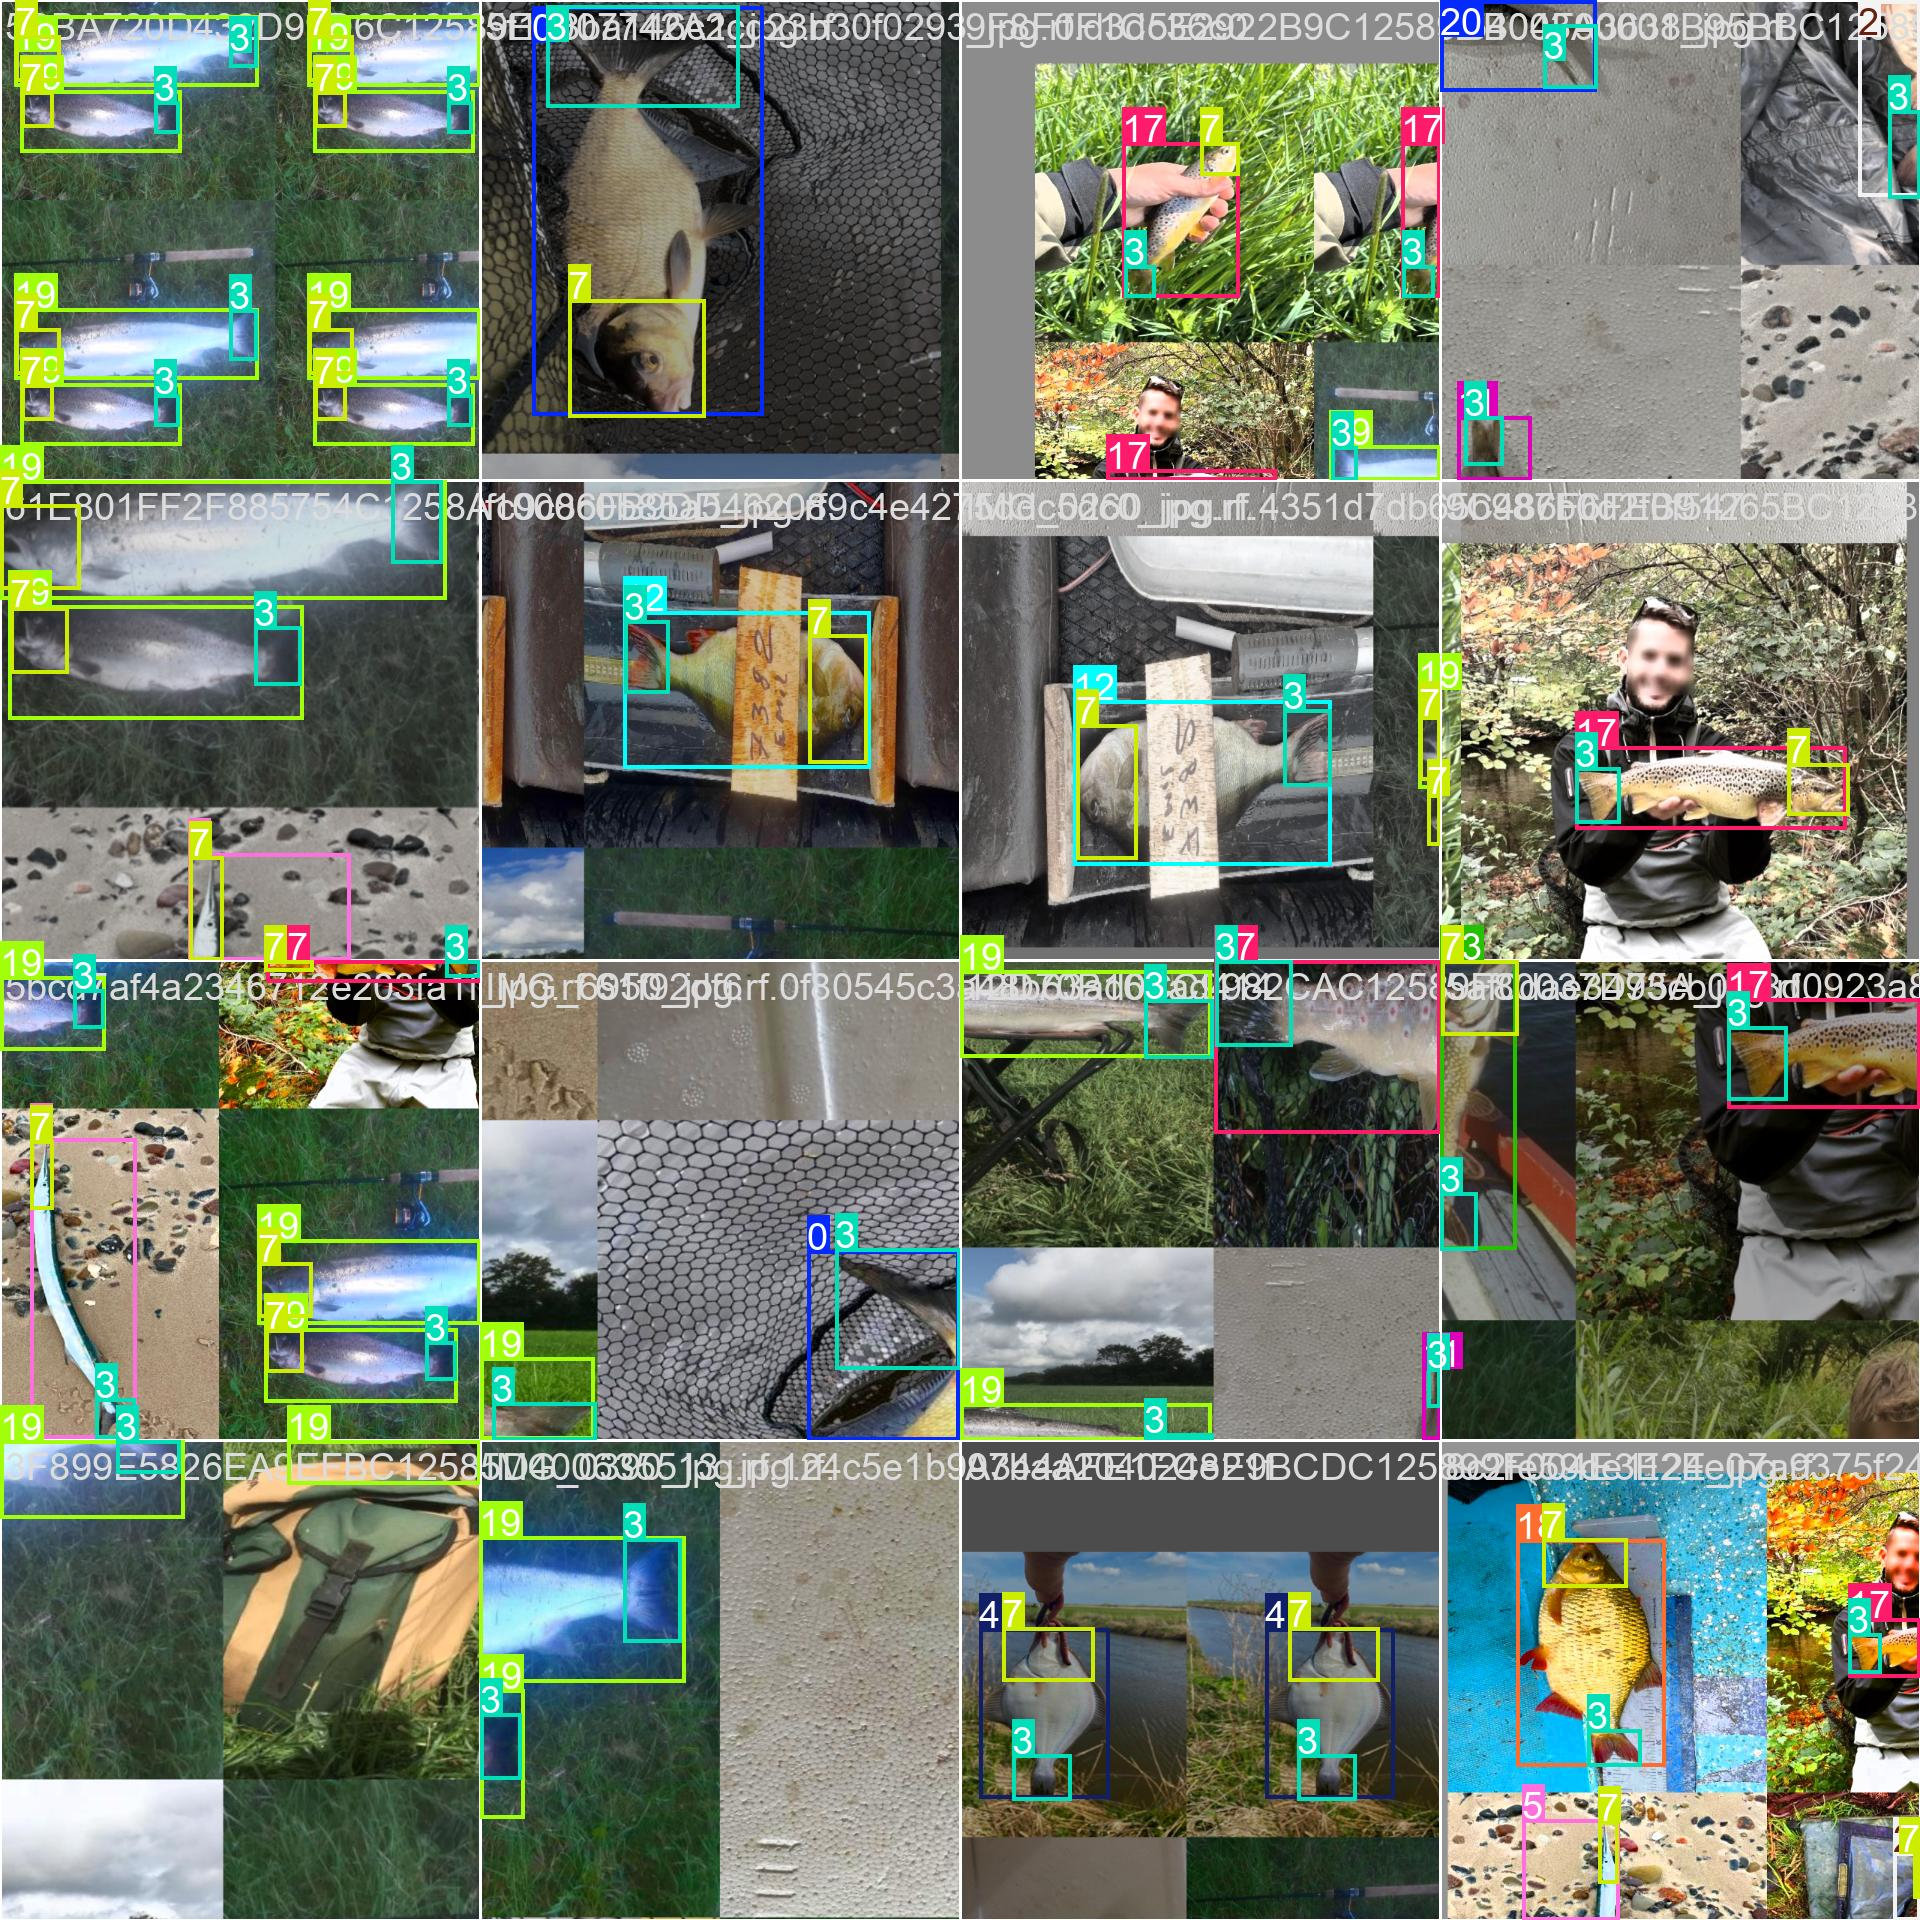

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

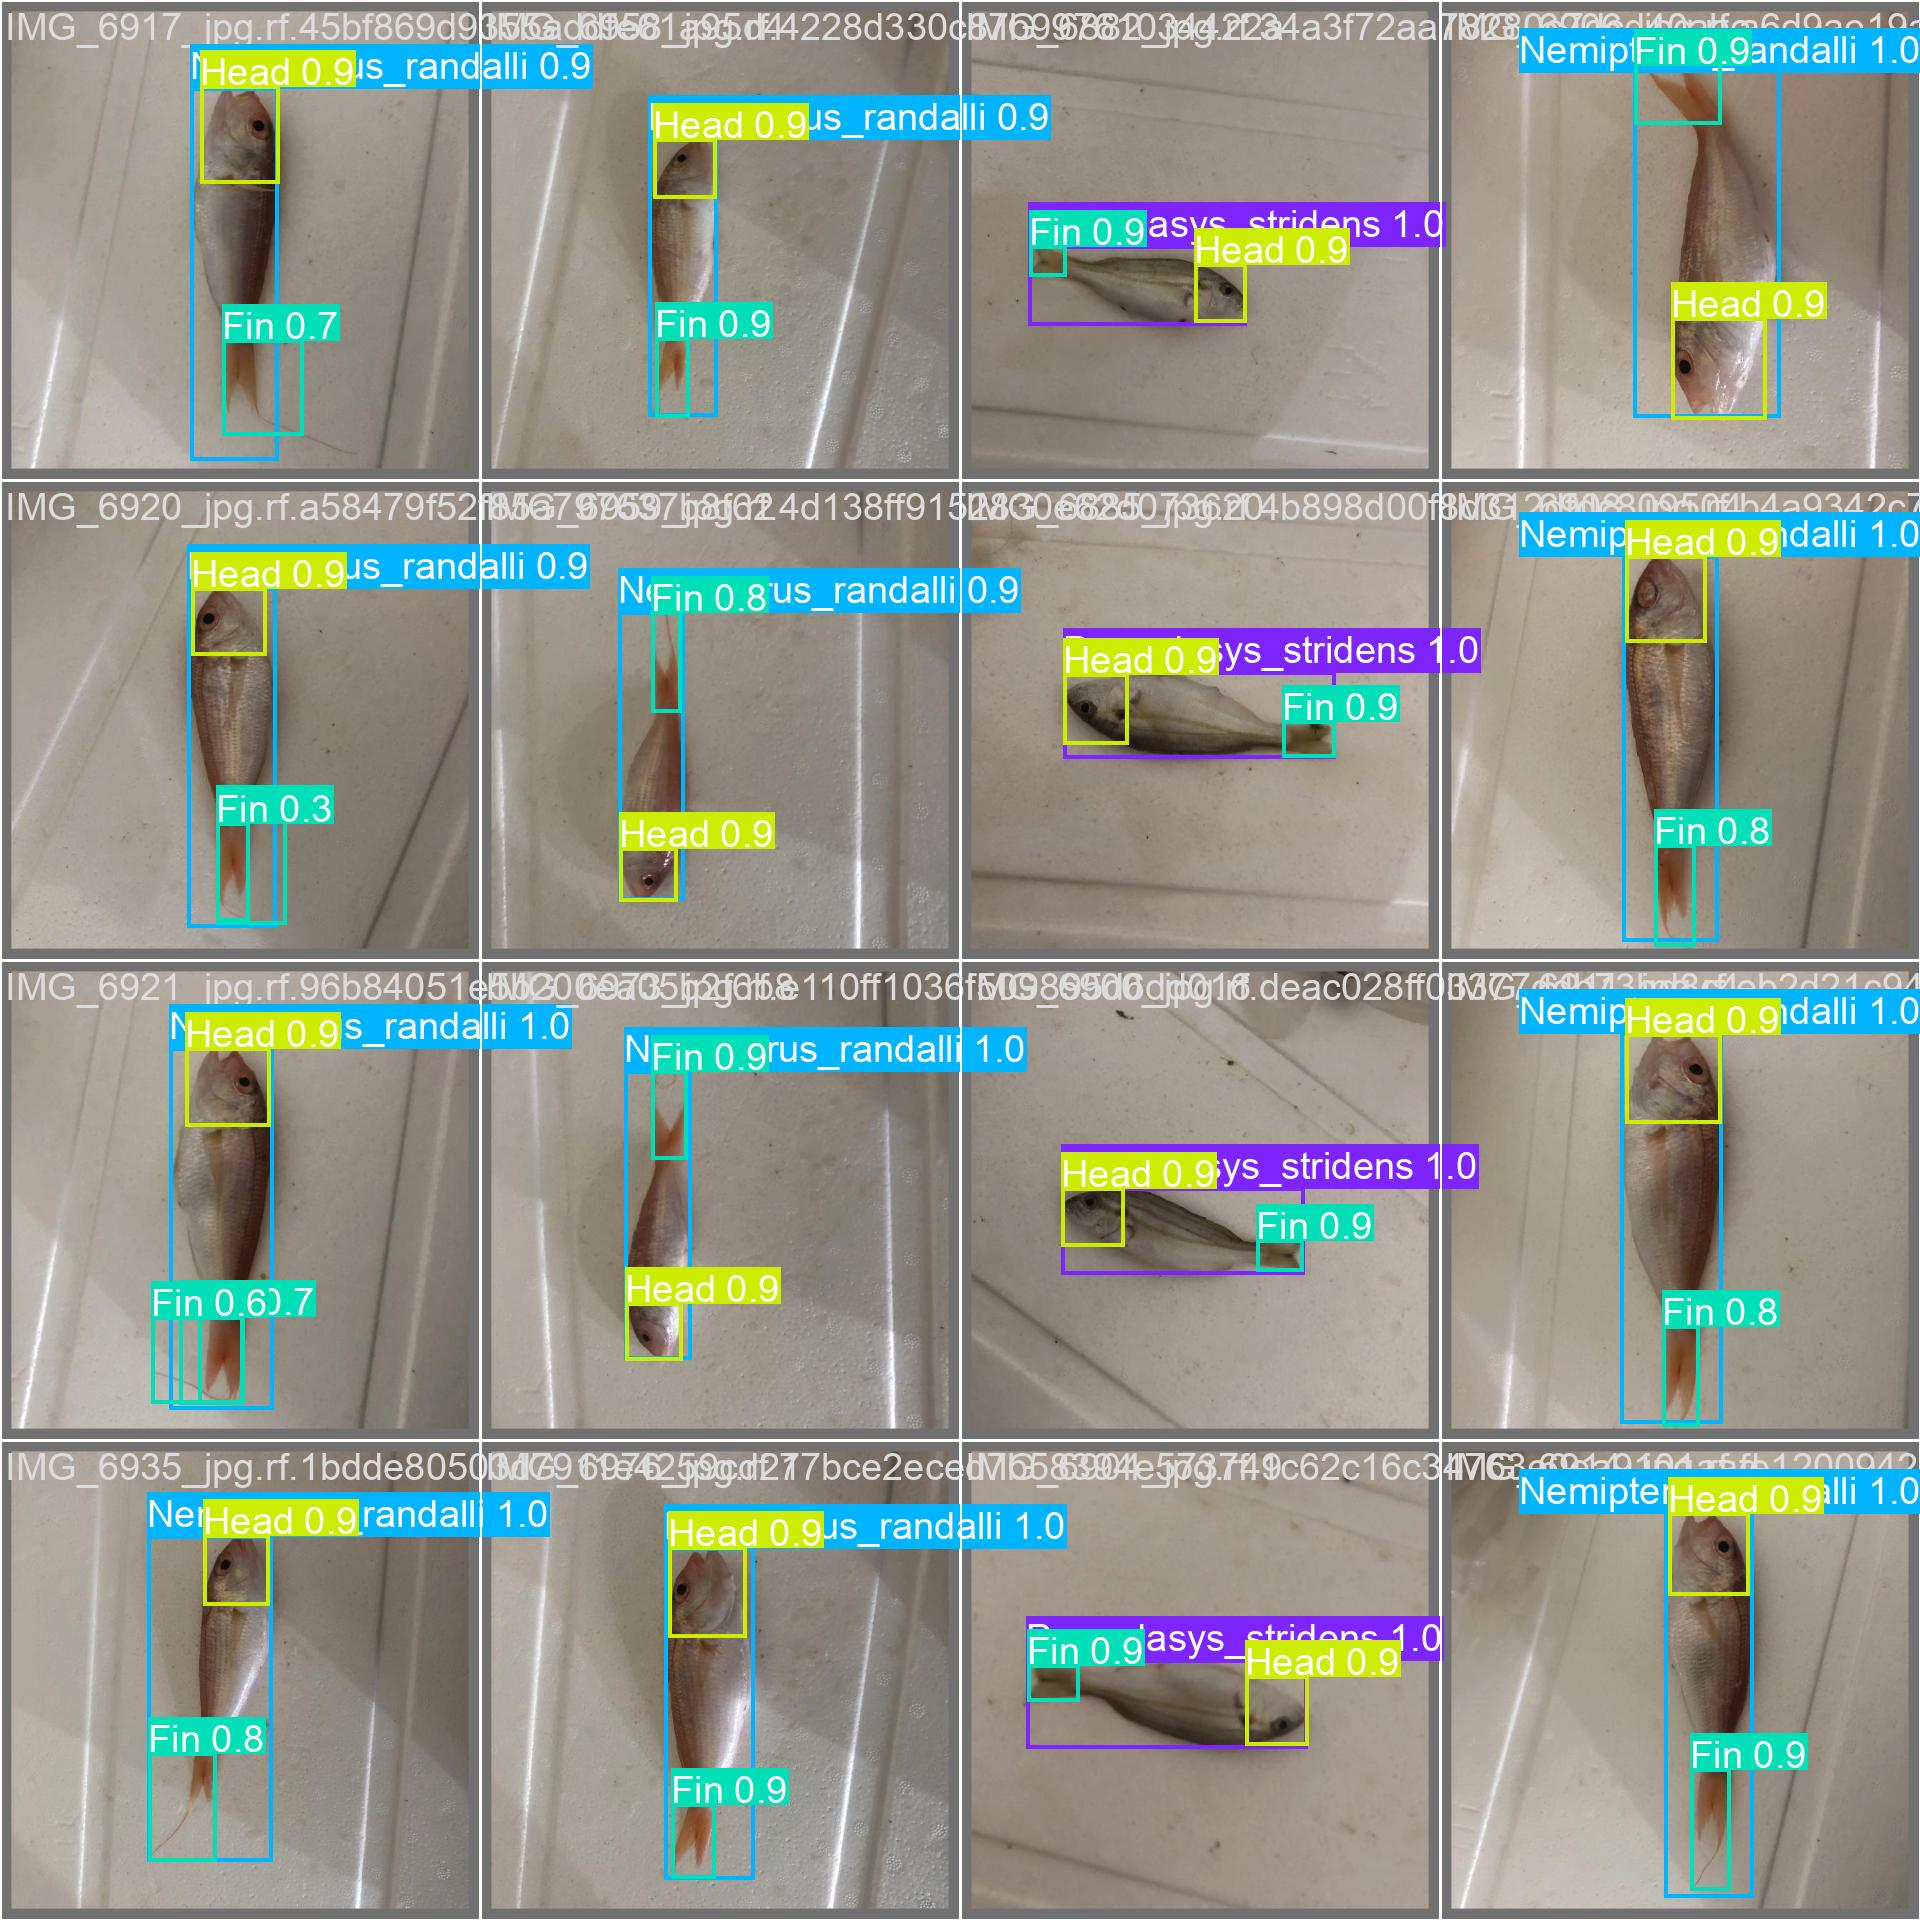

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

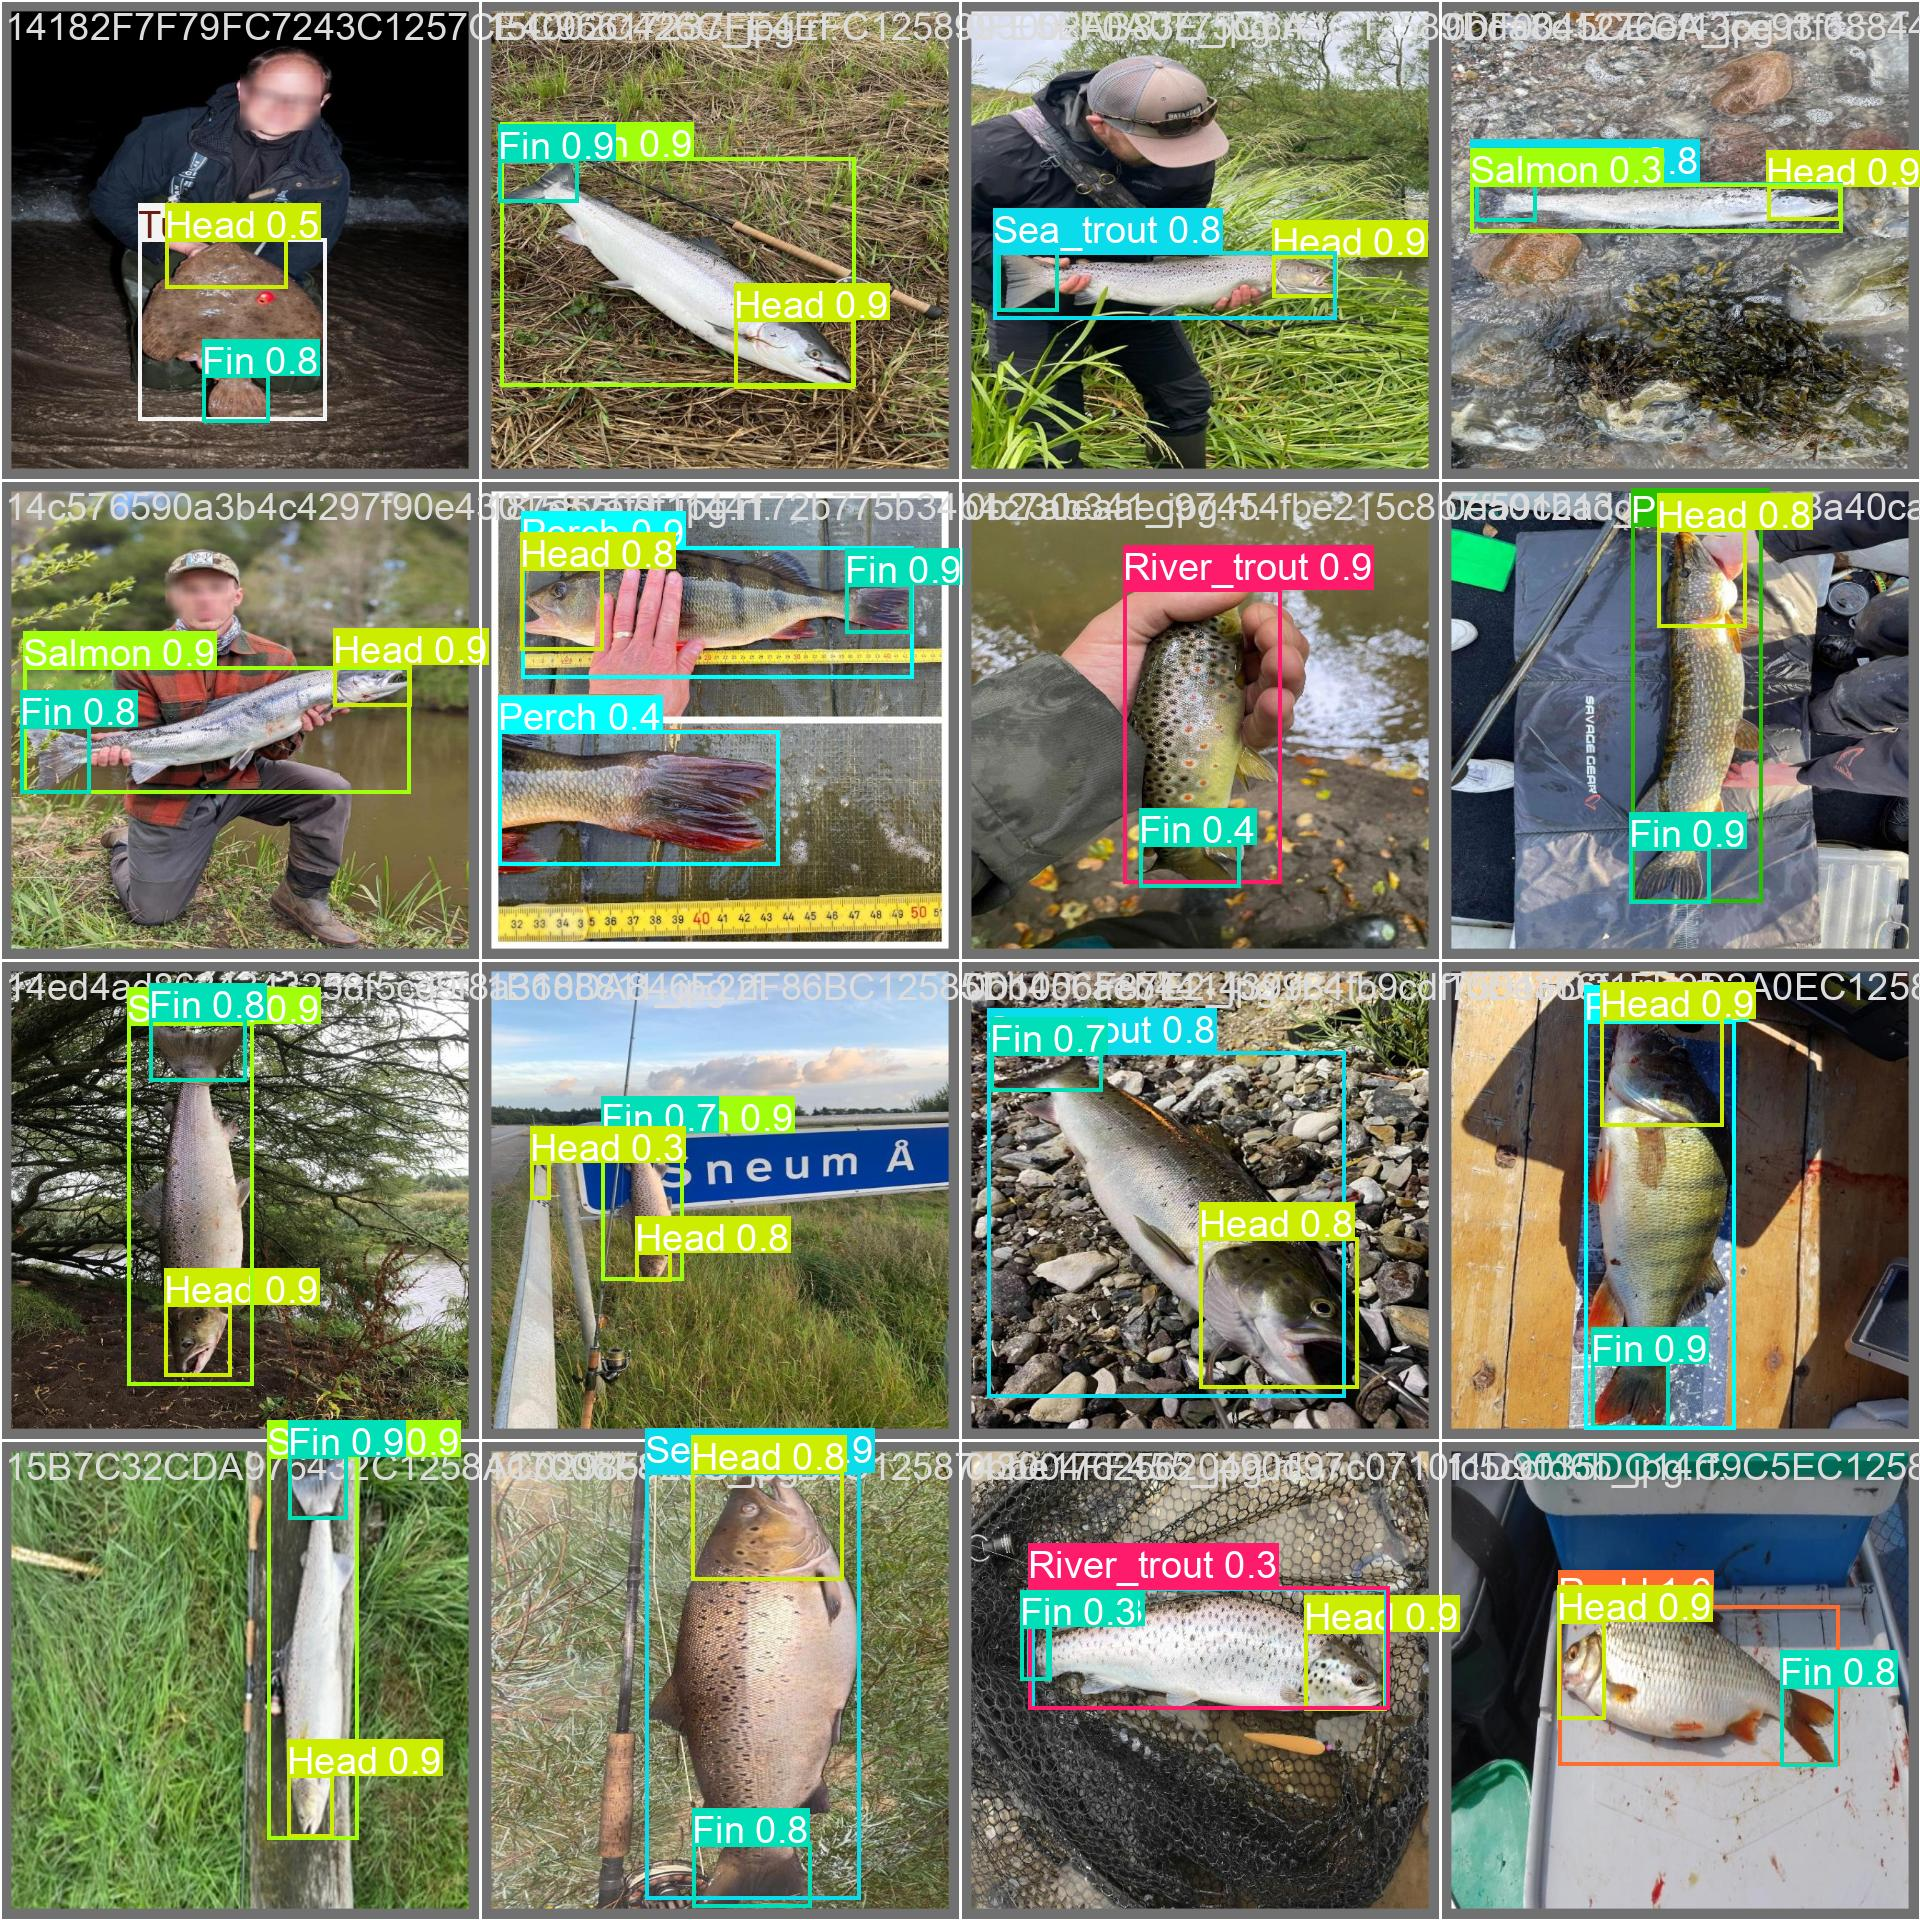

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

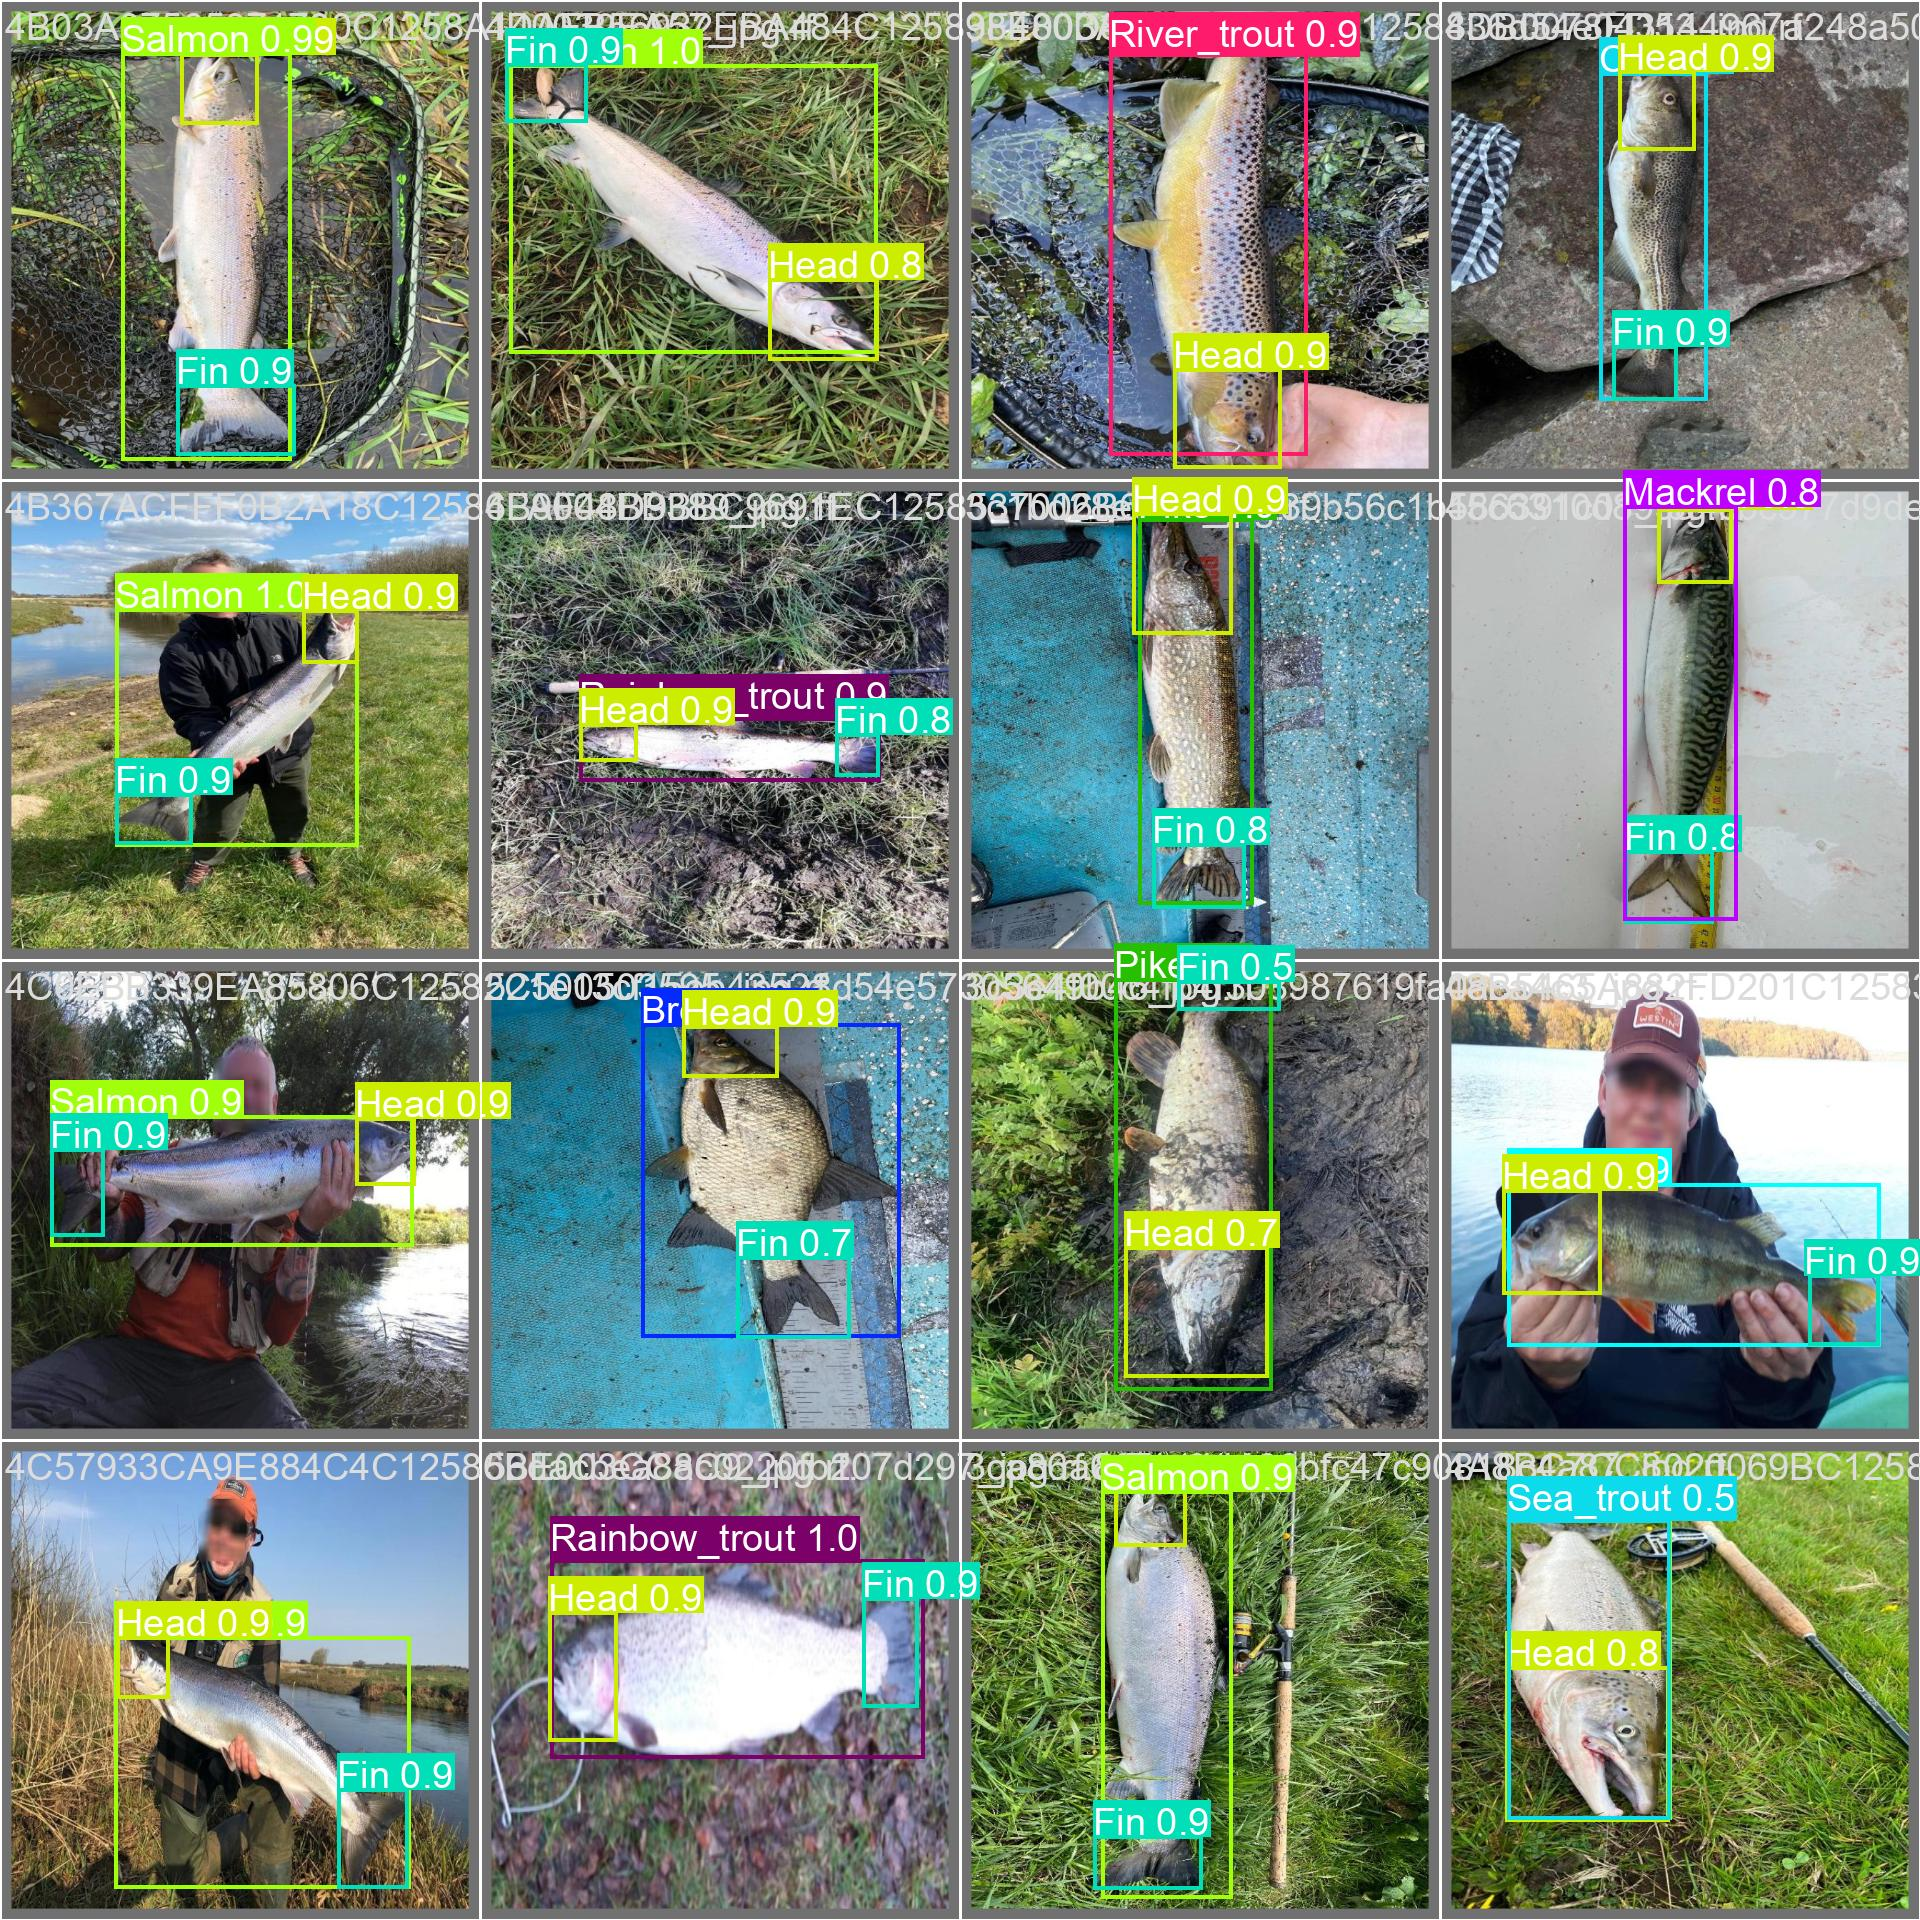

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml #  Validate Fine-Tuned Model

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Balik_model-3/valid/labels.cache... 468 images, 0 backgrounds, 0 corrupt: 100% 468/468 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:07<00:00,  3.88it/s]
                   all        468       1586      0.896      0.836      0.921      0.817
                 Bream          6          6          1      0.885      0.995       0.98
                   Cod         18         19       0.93      0.895      0.965      0.824
           Common_carp          3          3      0.799      0.667      0.863      0.863
                   Fin        458        523      0.974      0.864      0.968      0.687
              Flounder         16         16      0.926      0.779      0.907      0.809
               Garfish         24         29    

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source={dataset.location}/test/images save=True  # 08 Inference with Custom Model on Images

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs

image 1/467 /content/Balik_model-3/test/images/00DD7FD0A36731D7C1258A03002542A2_jpg.rf.1ba9d35ef3908eb567cc85219c019e00.jpg: 640x640 1 Fin, 1 Head, 1 River_trout, 10.3ms
image 2/467 /content/Balik_model-3/test/images/00b4b4a49d4b49089a90c65b0f69577e_jpg.rf.b63da172498fe0a7325bb5594c7b2db1.jpg: 640x640 1 Fin, 1 Head, 1 Sea_trout, 8.8ms
image 3/467 /content/Balik_model-3/test/images/011BB8DFA429091CC12589B40073C199_jpg.rf.4c7388289d5d0c0a576606db1a59798c.jpg: 640x640 1 Fin, 1 Head, 1 Rainbow_trout, 1 River_trout, 9.3ms
image 4/467 /content/Balik_model-3/test/images/01AD9D0A38861878C12586F80065A986_jpg.rf.ccfd606cb24181a8f08be7e4c6562163.jpg: 640x640 1 Fin, 1 Head, 1 Sea_trout, 8.3ms
image 5/467 /content/Balik_model-3/test/images/03be100883b24706b07e4cd7714bed94_jpg.rf.fc6c64267d30791d7d14019ff286684f.jpg: 640x640 1 Cod, 1 He

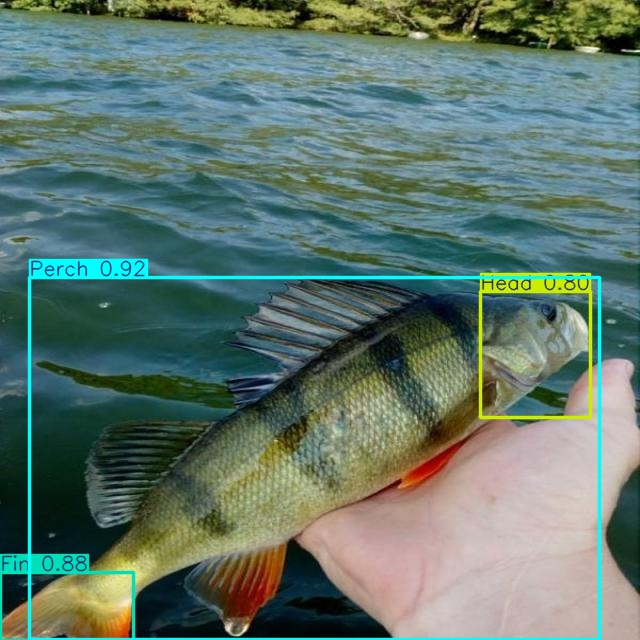

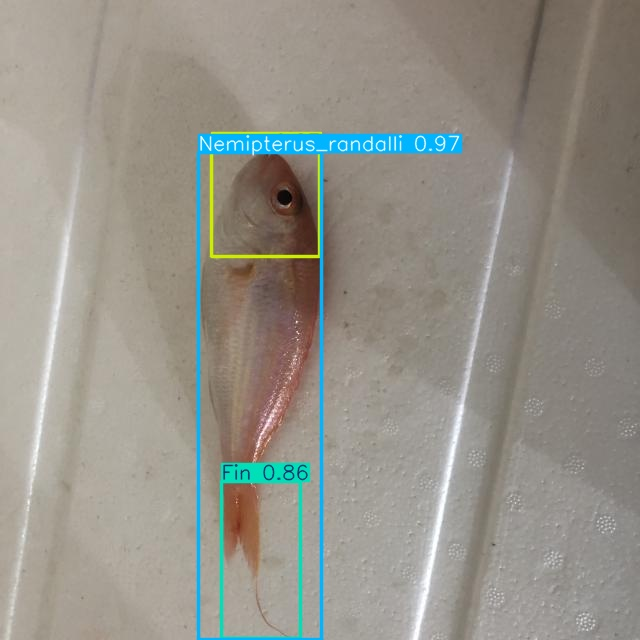

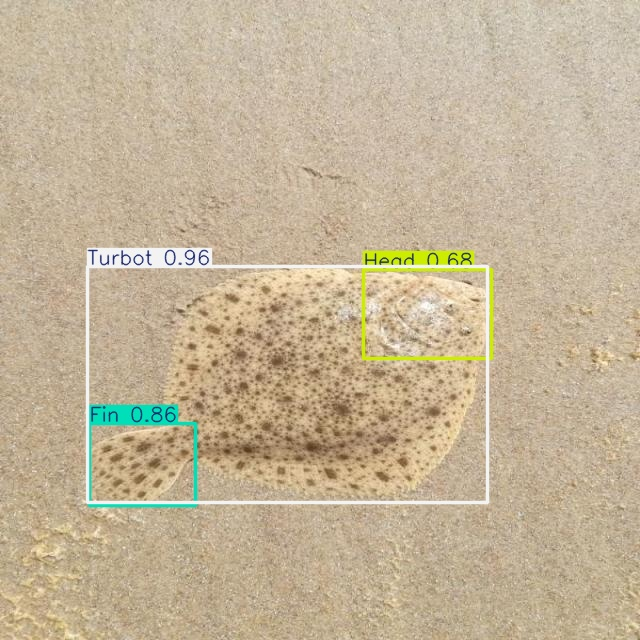

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source=/content/Balik_model-3/test/images/00DD7FD0A36731D7C1258A03002542A2_jpg.rf.1ba9d35ef3908eb567cc85219c019e00.jpg

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Balik_model-3/test/images/00DD7FD0A36731D7C1258A03002542A2_jpg.rf.1ba9d35ef3908eb567cc85219c019e00.jpg: 640x640 1 Fin, 1 Head, 1 River_trout, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 569.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


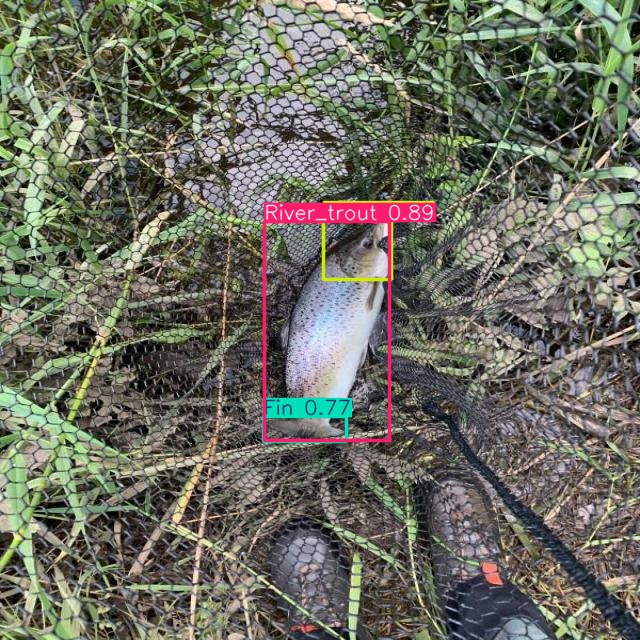

In [ ]:
Image("/content/runs/detect/predict/00DD7FD0A36731D7C1258A03002542A2_jpg.rf.1ba9d35ef3908eb567cc85219c019e00.jpg", width=600)